# Analysis of the Most Streamed Spotify Songs in 2023



## 1. Business Understanding

This initial phase focuses on understanding the project objectives and requirements from a business perspective, then converting this knowledge into a data mining problem definition and a preliminary plan.

## 2. Data Understanding

This phase involves initial data collection and familiarization, including data cleaning, transformation, and exploration to identify quality issues and insights about the data.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import ols

import time

# Setting styles for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Ignore warnings in the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/spotify-2023.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Creating a copy of the dataframe for cleaning
df_cleaned = df.copy()

### 2.1. General Information about the dataset

In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


The dataframe contains various features related to songs, artists, and their attributes or performance metrics across different platforms.

In order to better understand each feature present in the dataset, here's a quick overview of the dataset columns based on the initial few rows:

- track_name: The title of the tracks.
- artist(s)_name: Names of the artist(s) associated with each track.
- artist_count: The number of artists contributing to each track.
- released_year, released_month, released_day: The release date components for each track.
- Various metrics representing the track's presence and popularity on different music streaming platforms: in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts
- bpm: The tempo of the track, measured in beats per minute.
- key: The key in which the track is composed.
- mode: The mode of the track (major or minor).
- Various metrics representing the track's musical qualities, including danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%.



In [4]:
df.shape

(953, 24)

In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### 2.2. Data Quality Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
# Checking for duplicates
num_duplicates = df.duplicated().sum()
num_duplicates

0

### 2.3. Explore unique feature values

In [9]:
#df['released_year'].unique()

In [10]:
#df['released_month'].unique()

In [11]:
#df['released_day'].unique()

In [12]:
#df['streams'].unique()

 it seems there's a peculiar value: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'. This doesn't follow the numerical pattern that we would expect for a column that's supposed to represent streaming counts.

In [13]:
#df['in_deezer_playlists'].unique()

In [14]:
#df['in_shazam_charts'].unique()

In [15]:
#df['bpm'].unique()

In [16]:
#df['mode'].unique()

In [17]:
#df['danceability_%'].unique()

In [18]:
#df['liveness_%'].unique()

In [19]:
#df['instrumentalness_%'].unique()

In [20]:
#df['speechiness_%'].unique()

### 2.4. Data Pre-processing

Before we dive into individual data cleaning tasks, let's summarize the initial steps we need to undertake for <b>Data Cleaning and Transformation</b>:
<br>
1. Convert 'released_year', 'released_month', and 'released_day' into a single datetime object.
2. Clean the 'streams' column and convert its data type.
3. Remove commas from 'in_deezer_playlists' and 'in_shazam_charts' and convert them to integers. If there are NaN values, changed them to 0.
4. Discuss the potential conversion of 'key' and 'mode' into category types.
5. Handle NaN values in ‘in_shazam_charts’ and ‘key’. The NaN values in ‘in_shazam_charts’ should be replaced with 0.

We will start with the conversion of the 'released_year', 'released_month', and 'released_day' columns into a single datetime object. This process involves creating a string representation of the date and then converting that string to a datetime object. 

In [21]:
# Step 1: Ensure the year, month, and day columns are integers (they should already be)
for col in ['released_year', 'released_month', 'released_day']:
    df_cleaned[col] = df_cleaned[col].astype(int)

# Step 2: Combine the year, month, and day into a single column (as a string)
df_cleaned['release_date'] = df_cleaned['released_year'].astype(str) + '-' + \
                             df_cleaned['released_month'].astype(str).str.zfill(2) + '-' + \
                             df_cleaned['released_day'].astype(str).str.zfill(2)  # zfill ensures a format like 2023-07-14

# Step 3: Convert the 'release_date' column to a datetime object
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%Y-%m-%d')

# Step 4: (Optional) Drop the original 'released_year', 'released_month', and 'released_day' columns
# We will retain these columns for now, as they might be useful for analysis later on.

# Display the first few rows of the cleaned dataframe to verify our changes
df_cleaned[['released_year', 'released_month', 'released_day', 'release_date']].head()


,released_year,released_month,released_day,release_date
0,2023,7,14,2023-07-14
1,2023,3,23,2023-03-23
2,2023,6,30,2023-06-30
3,2019,8,23,2019-08-23
4,2023,5,18,2023-05-18


The 'released_year', 'released_month', and 'released_day' columns were successfully merged into a single 'released_date' column in the datetime format.

Next, we'll clean the 'streams' column. This process typically involves removing any non-numeric characters that might interfere with calculations or statistical analysis, and converting the cleaned strings to an integer data type. This step ensures that the 'streams' data is ready for any numerical operations we might need to perform during the analysis. 

In [22]:
# Cleaning the 'streams' column by removing non-numeric characters and converting to integers
df_cleaned['streams'] = df_cleaned['streams'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)

df_cleaned[['streams']].head()  # Verifying the transformation

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322


The 'streams' column has been successfully cleaned and converted to integers. All non-numeric characters were removed, ensuring that this column is now suitable for numerical analysis.

Next, we'll clean the 'in_deezer_playlists' and 'in_shazam_charts' columns. This involves:

1. Removing any commas from the numbers, which are typically used as thousand separators.
2. Converting the cleaned strings to integers.
3. Handling NaN or other problematic values by replacing them with 0.

In [23]:
# Cleaning 'in_deezer_playlists' and 'in_shazam_charts' columns, converting to integers, and handling NaN values

# Remove commas and convert to integers (if conversion fails due to NaN or non-numeric, replace with 0)
df_cleaned['in_deezer_playlists'] = df_cleaned['in_deezer_playlists'].replace('[,]', '', regex=True).astype(float).fillna(0).astype(int)
df_cleaned['in_shazam_charts'] = df_cleaned['in_shazam_charts'].replace('[,]', '', regex=True).astype(float).fillna(0).astype(int)

# Verifying the transformation
df_cleaned[['in_deezer_playlists', 'in_shazam_charts']].head()

,in_deezer_playlists,in_shazam_charts
0,45,826
1,58,382
2,91,949
3,125,548
4,87,425


The 'in_deezer_playlists' and 'in_shazam_charts' columns have been successfully cleaned, with commas removed and the data converted to integers. Any NaN or problematic values were replaced with 0, making these columns ready for numerical analysis.

Next, we should discuss the conversion of 'key' and 'mode' into categorical data types. In data analysis, especially when preparing data for machine learning models, it's important to properly format categorical variables. This often involves converting columns that contain categorical data into a format that is recognized as such, which can help with memory efficiency and potentially improve the performance of certain algorithms.

- Key of the song ('key'): This represents the musical key in which a song is written, a category that is inherently nominal. Since there are a limited number of musical keys, it makes sense to convert this column into a categorical type, which can facilitate certain types of analysis and visualizations.

- Mode of the song ('mode'): This typically indicates whether a piece of music is in a major key or a minor key, another inherently categorical attribute. Converting this to a categorical type makes sense for the same reasons as the 'key' column.

For both columns, converting them to category types will ensure they are treated appropriately in our analyses and can help with both memory usage and computational efficiency, particularly when creating machine learning models.

Now, we'll proceed with converting these columns to category types. Additionally, we will handle NaN values in the ‘key’ column by investigating its content and deciding the best strategy for NaN replacement or imputation. The 'in_shazam_charts' column has already been cleaned in previous steps.

In [24]:
# Converting 'key' and 'mode' columns to category types
df_cleaned['key'] = df_cleaned['key'].astype('category')
df_cleaned['mode'] = df_cleaned['mode'].astype('category')

# Handling NaN values in 'key' - we need to check if there are any NaN values first
nan_in_key = df_cleaned['key'].isna().sum()

# Checking the data types of 'key' and 'mode' and the number of NaNs in 'key'
key_mode_dtypes = df_cleaned[['key', 'mode']].dtypes
nan_in_key, key_mode_dtypes

(95,
 key     category
 mode    category
 dtype: object)

The 'key' and 'mode' columns have been successfully converted to category types.

Upon inspection, we found 95 NaN values in the 'key' column. Given that these represent musical keys, it wouldn't be appropriate to fill these missing values arbitrarily, as doing so could introduce bias or inaccuracies in the analysis.

In the context of data preparation for analysis or machine learning, we have several options:

1. Imputation based on other data: If there are other features correlated with 'key', we could use them to impute the missing values (e.g., using a model to predict the missing keys based on other song attributes). However, this approach requires a suitable model and sufficient related data.

2. Filling with a placeholder value: We could fill the NaNs with a placeholder value indicating that the key is unknown. This approach keeps the data size consistent but introduces a new category that the model will interpret as a distinct value, which might not be accurate.

3. Dropping the missing values: If the number of rows with missing 'key' data is small compared to the entire dataset, we might consider dropping these rows. This method reduces the risk of introducing bias, but at the expense of a smaller dataset.

Considering that we have 95 missing values, we need to decide based on the total size of our dataset. If the dataset is significantly large, option 3 could be viable; otherwise, option 2 may be more appropriate to avoid losing too much data.

The dataset contains 953 entries in total. Given this, the 95 entries with missing 'key' values represent approximately 10% of the dataset.

Here's how we can proceed based on this information:

1. Dropping the missing values: Removing 10% of the dataset could potentially eliminate valuable information and might not be the best approach, especially if the remaining data doesn't sufficiently represent the scope needed for accurate analysis or model training.

2. Filling with a placeholder value: This approach seems more balanced, as it retains all entries while acknowledging the missing information. We could use a placeholder like 'Unknown' for the missing 'key' values. This method acknowledges the incompleteness of the data without introducing unwarranted bias.

Given the circumstances, option 2 seems to be the most appropriate. We'll fill the NaN values in the 'key' column with 'Unknown', which will later be considered as a separate category during analysis and model training. Let's implement this solution.

In [25]:
# Filling NaN values in 'key' with a placeholder value 'Unknown'
df_cleaned['key'] = df_cleaned['key'].cat.add_categories('Unknown').fillna('Unknown')

# Verifying the operation by checking again for NaN and viewing the first few rows where 'key' was initially NaN
nan_check_after_filling = df_cleaned['key'].isna().sum()  # this should be 0 now
rows_with_unknown_key = df_cleaned[df_cleaned['key'] == 'Unknown'].head()

nan_check_after_filling, rows_with_unknown_key[['key']]

(0,
         key
 12  Unknown
 17  Unknown
 22  Unknown
 35  Unknown
 44  Unknown)

In [26]:
df_cleaned.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

The NaN values in the 'key' column have been successfully replaced with the placeholder 'Unknown', and we've verified that there are no longer any NaN values in this column. This approach maintains the integrity of our dataset while acknowledging the presence of missing or unrecorded information.

With these preprocessing steps completed, your dataset is now cleaner and structured more suitably for in-depth analysis and machine learning. Each step taken ensures the data's consistency, accuracy, and readiness for the subsequent stages of your project, particularly exploratory data analysis (EDA), where insights begin to take shape.

#### Saving cleaned dataframe to CSV

In [27]:
# Define the path for the new cleaned data file
cleaned_file_path = '/Users/diogosilva/Desktop/projeto_metyis/spotify_cleaned.csv'

# Save the cleaned DataFrame to a new CSV file
# df_cleaned.to_csv(cleaned_file_path, index=False)  # The index=False parameter prevents writing row indices

# Provide the path for confirmation
cleaned_file_path

'/Users/diogosilva/Desktop/projeto_metyis/spotify_cleaned.csv'

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    int64         
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    int64         
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

### 2.5. Initial EDA

Initiating the Exploratory Data Analysis (EDA) involves several steps that help us understand the distributions, central tendencies, and relationships within our data. This process is crucial for determining the appropriate statistical methods and machine learning models to apply later. Here's how we'll proceed:

- Summary Statistics: We'll generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

- General Information: We'll review the dataset's structure, including the number of entries, the data types, and the presence of any remaining missing values.

- Outlier Detection and Analysis: We'll visualize the data to identify any outliers or anomalies that could influence our analyses. We'll use box plots and histograms for this purpose and discuss potential strategies for handling detected outliers.

In [29]:
# Summary statistics for the dataset
summary_statistics = df_cleaned.describe()
summary_statistics

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,1.211250e+10,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,3.580501e+11,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.105376e+13,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


The summary statistics provide a comprehensive overview of the dataset's distribution. Here are some insights:

- The mean number of artists involved in a track is approximately 1.56, with tracks ranging from solo artists to collaborations of multiple artists.
- The average Beats Per Minute (BPM) is around 122.54, indicating a moderate tempo across the songs in the dataset.
- Features like 'danceability_%', 'valence_%', and 'energy_%' have mean values of approximately 66.97, 51.43, and 64.28, respectively, suggesting a balanced presence of these characteristics in the tracks.
- The 'streams' column shows a significant disparity between the 75th percentile and the maximum value, hinting at potential outliers or extremely popular tracks that could be skewing this data.

### 2.6. Outlier detection

For a more detailed understanding, especially concerning potential outliers, we need to visualize the data. Visual methods like box plots and histograms will allow us to observe the distribution of data points and identify any values that deviate significantly from the pattern.

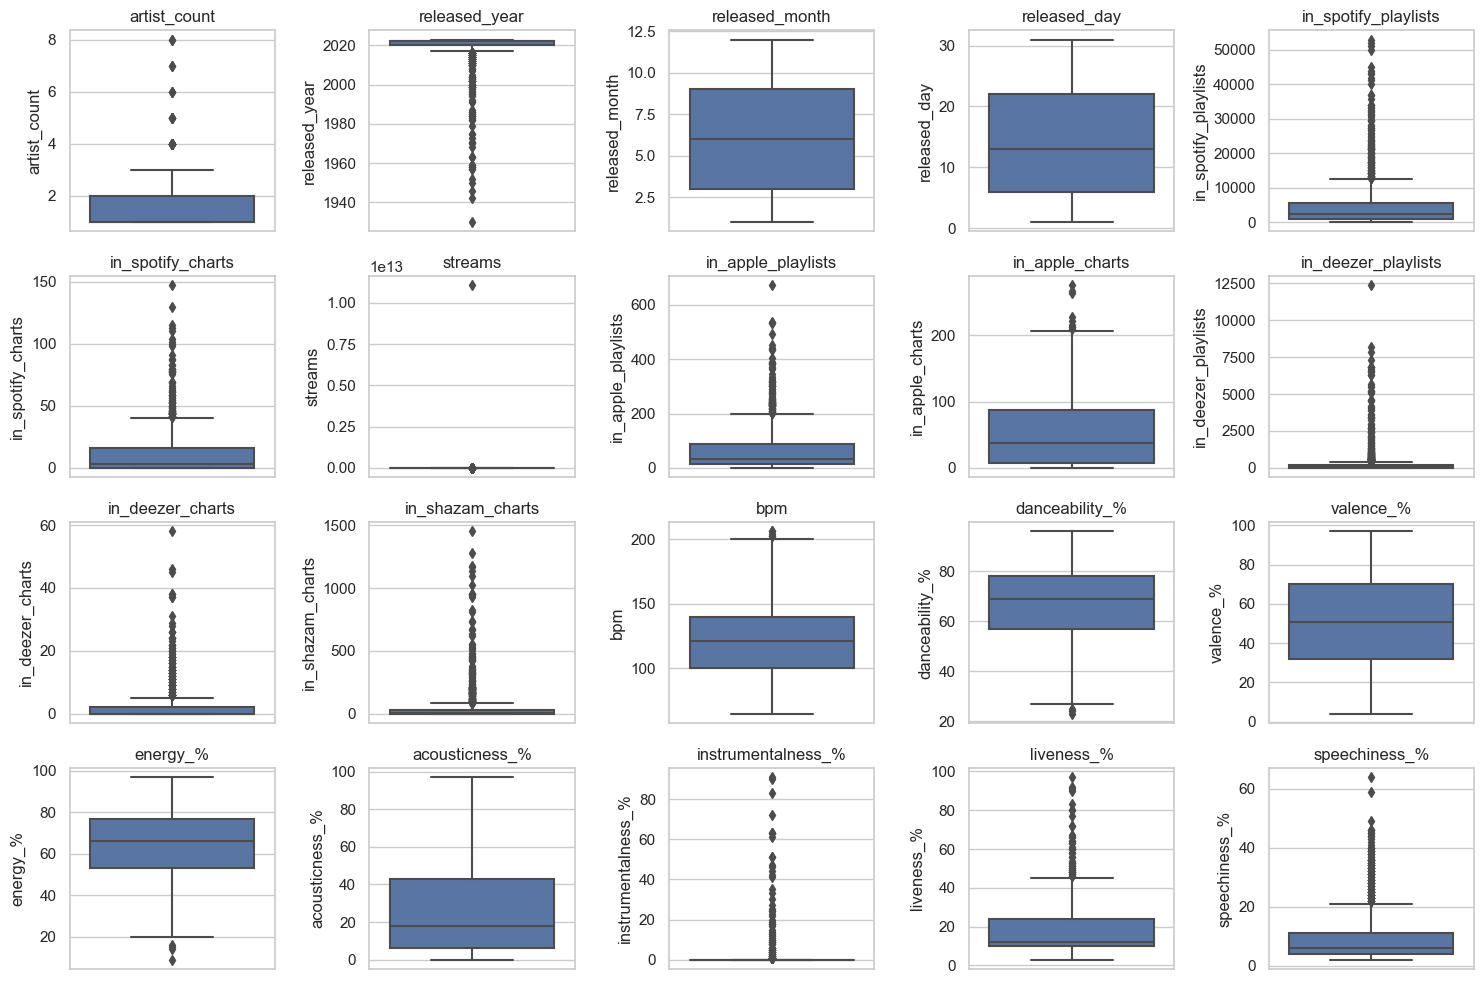

In [30]:
# List of numerical columns for the boxplot visualization
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))

# Creating subplots for each feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df_cleaned[col])
    plt.tight_layout()
    plt.title(col)

plt.show()

Here are some observations from the box plots:

- Streams: This column shows significant outliers, with some values far exceeding the typical range. These could be extremely popular songs with streams much higher than average.

- in_deezer_playlists and in_shazam_charts: These columns also exhibit a number of points outside the typical range, suggesting the presence of songs that are exceptionally popular or unpopular on these platforms.

- instrumentalness_%, liveness_%, and speechiness_%: The distributions for these columns are heavily skewed, with several outliers. This could indicate songs with unusual characteristics (e.g., a talk show or podcast episode with high speechiness, a live concert recording, or a track that is purely instrumental).

- Variables like bpm, danceability_%, valence_%, and energy_% seem to have a relatively normal distribution with fewer outliers, indicating that most songs fall within a typical range for these musical characteristics.

The presence of outliers isn't necessarily a cause for concern, as they might represent valid but extreme cases. However, it's important to analyze these outliers to understand whether they represent true data points or if they're the result of errors or noise.

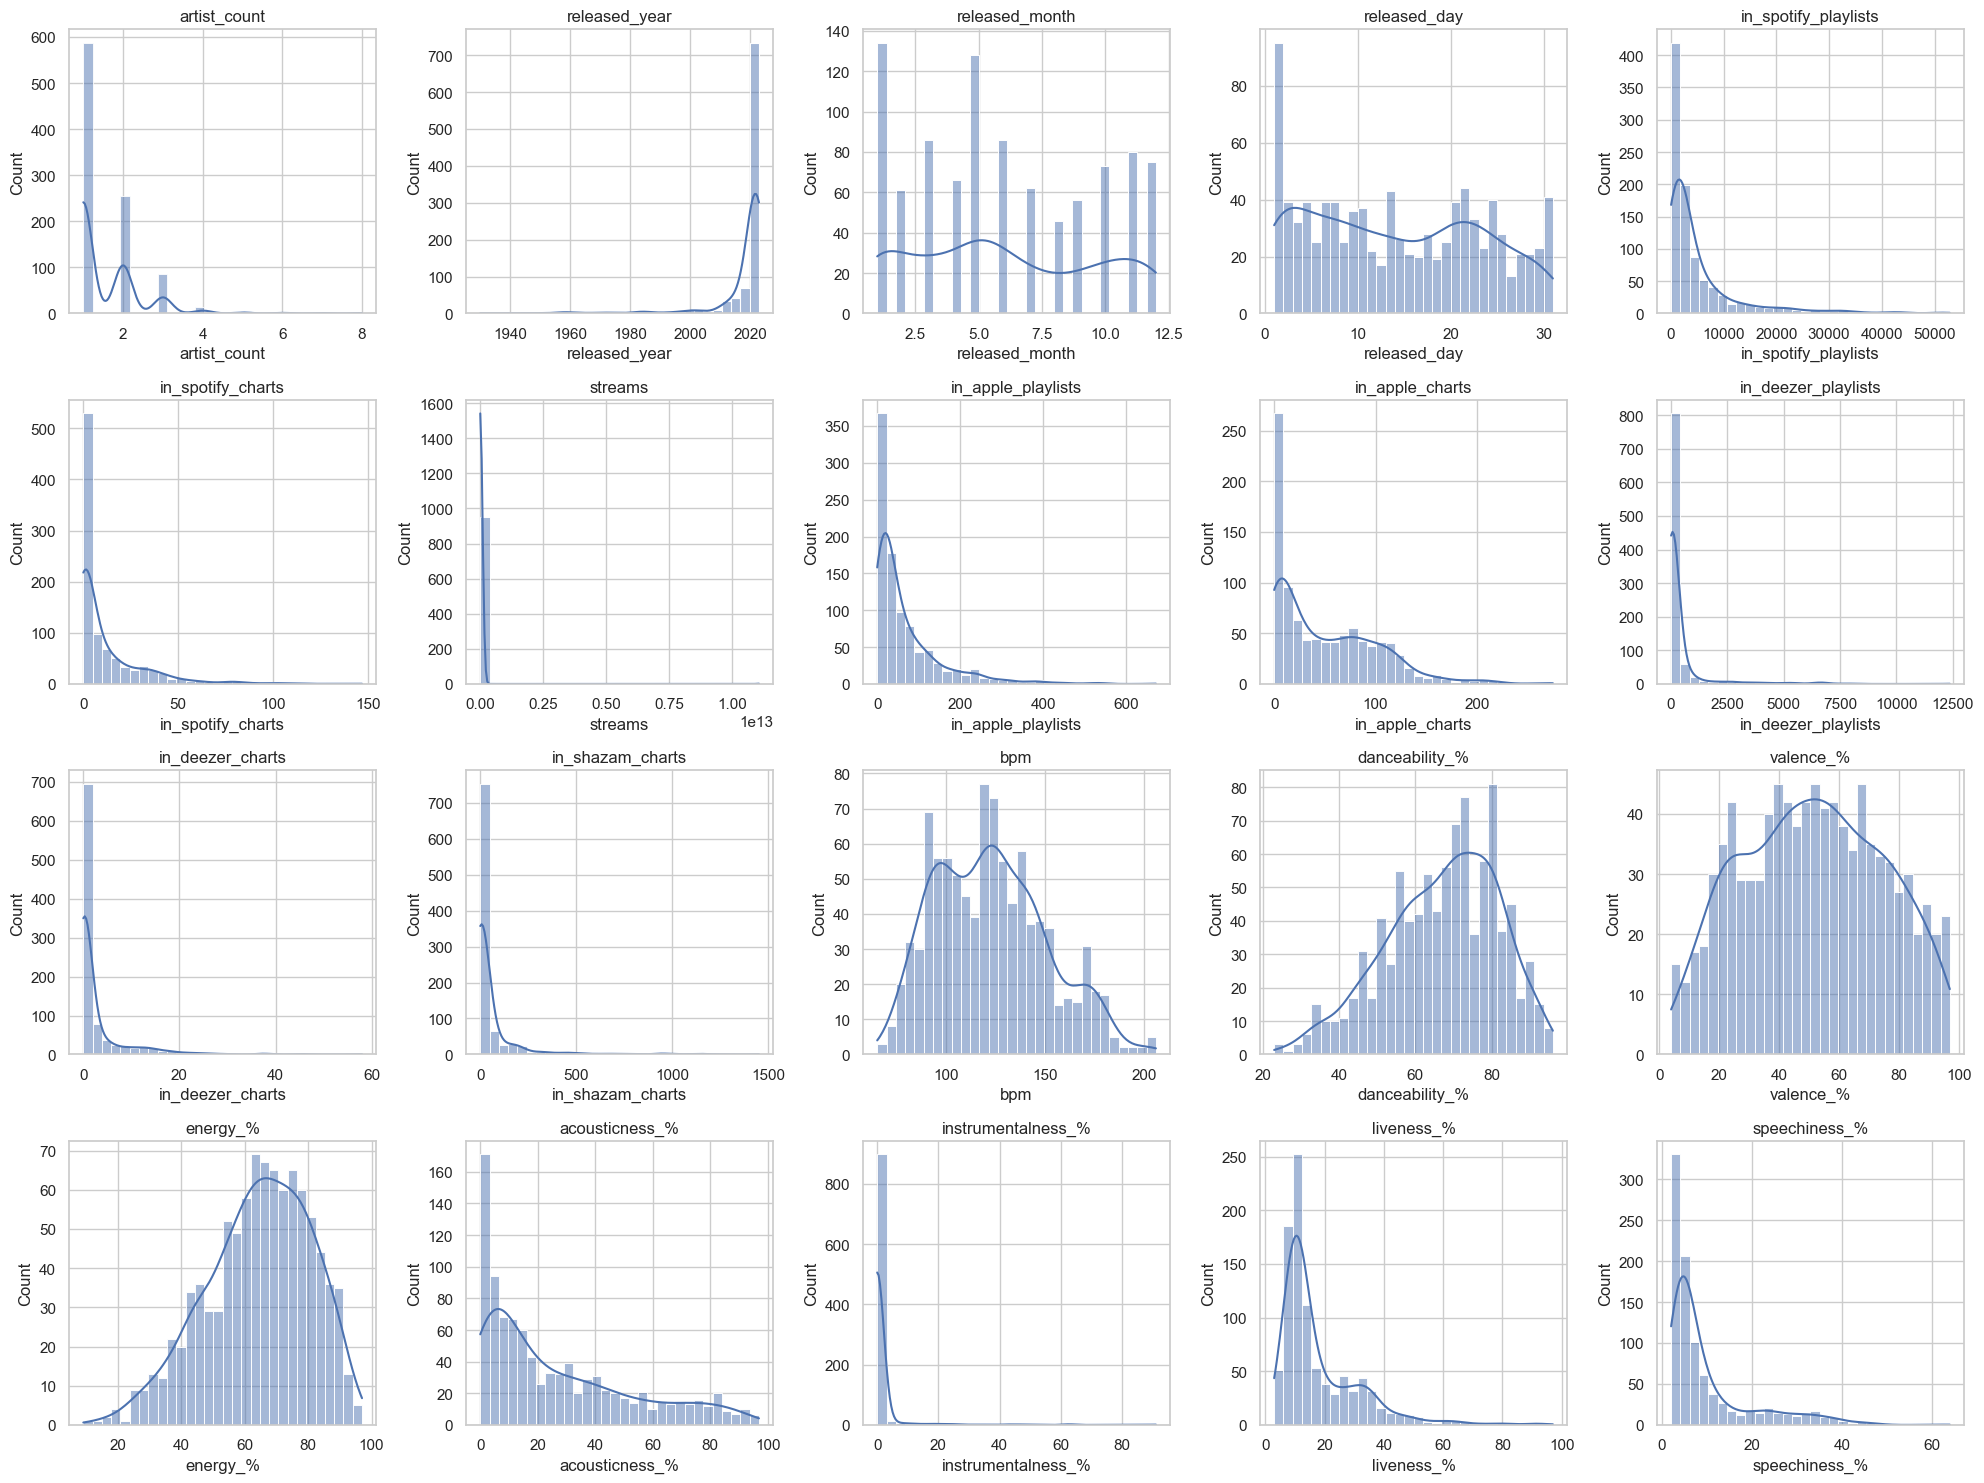

In [31]:
# Setting up the figure size for clearer and more detailed visuals
plt.figure(figsize=(20, 15))

# Creating histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data=df_cleaned, x=col, bins=30, kde=True)  # kde is Kernel Density Estimation plot
    plt.tight_layout()
    plt.title(col)

plt.show()

The histograms, complemented with Kernel Density Estimation (KDE), provide a detailed view of the distributions of your numerical data. The KDE helps understand the probability density of the data at different values, making it easier to see the concentration and dispersion of data points.

Here are some insights based on the histograms:

- Streams: The data is extremely right-skewed, indicating that there are a few songs with exceptionally high stream counts. These could be viral hits or classics that are outliers in the typical song popularity context.

- Attributes like BPM, Danceability, Valence, and Energy: These characteristics show relatively normal distributions, indicating standard patterns in music composition. Outliers might be stylistic extremes (e.g., very fast BPM) or songs that are intrinsically unique.

- Platform-specific popularity (e.g., in_shazam_charts, in_deezer_playlists): These are also right-skewed, suggesting a few songs are exceptionally popular or trending on these platforms, perhaps due to marketing pushes, viral trends, or artist fame.

Given these observations, here's how we might approach outlier removal:

- Streams: Extremely high values could be legitimate (viral hits). Removing these might skew understanding of what makes a song successful. Instead, you might consider logarithmic transformation to reduce the skewness impact on models.

- Musical attributes (BPM, danceability, etc.): Extreme values could be genuine reflections of creative diversity. If these values don't align with common musical standards (e.g., an impossibly high BPM), they might be errors worth removing.

- Platform-specific metrics: These likely reflect real-world popularity disparities. However, if there are data points with values impossible in a real-world context (e.g., a song on more playlists than exist), these could be errors.

- Sentiment metrics (valence, energy, etc.): Outliers could reflect songs that are uniquely cheerful, melancholic, energetic, or calm. Removing these might eliminate key data on music's emotional diversity.


To systematically identify and potentially remove outliers, we'll use a common statistical method based on the Interquartile Range (IQR). Here's a breakdown of the steps:

1. Calculate the IQR: The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. It represents the middle 50% of the data points.

2. Determine the bounds: We calculate the lower bound (Q1 - 1.5 * IQR) and the upper bound (Q3 + 1.5 * IQR). Points outside these bounds are potential outliers.

3. Assess the outliers: We'll identify the outliers and assess their legitimacy (are they possible within the domain context?).

4. Decide on the outliers: Based on the assessment, we will decide which outliers to remove. The key is ensuring we don't lose valuable information or introduce bias.

5. Document the reasons: For each removed outlier, we should document the specific reason it was considered illegitimate or misleading.

Let's start by calculating the IQR for each numerical column and identifying potential outliers.

In [32]:
# Dictionary to store potential outliers
outliers = {}

# Calculating IQR and identifying outliers for each numerical column
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    potential_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers[col] = potential_outliers

# Check how many outliers have been identified for each column
outliers_count = {col: len(outliers_df) for col, outliers_df in outliers.items()}

outliers_count

{'artist_count': 27,
 'released_year': 151,
 'released_month': 0,
 'released_day': 0,
 'in_spotify_playlists': 109,
 'in_spotify_charts': 78,
 'streams': 75,
 'in_apple_playlists': 78,
 'in_apple_charts': 9,
 'in_deezer_playlists': 154,
 'in_deezer_charts': 143,
 'in_shazam_charts': 145,
 'bpm': 5,
 'danceability_%': 3,
 'valence_%': 0,
 'energy_%': 4,
 'acousticness_%': 0,
 'instrumentalness_%': 87,
 'liveness_%': 44,
 'speechiness_%': 136}

Given these numbers, we need to assess whether these outliers make sense in the context of the data and decide whether to keep or remove them.

- Platform-specific metrics (e.g., in_spotify_playlists, in_deezer_playlists): High numbers could be due to viral songs. We should consider the context (e.g., a global hit) before deciding.

- Song attribute metrics (e.g., bpm, danceability_%): Extremely high or low values might be data errors, or they could represent unique songs. Contextual understanding of what constitutes typical ranges for these metrics is crucial.

- Popularity metrics (e.g., streams): Very high numbers could be legitimate (e.g., hits by major artists) and important for understanding success factors.

- Emotional/Sentiment metrics (e.g., valence_% and energy_%): These don't have many outliers, indicating that most songs share similar emotional characteristics.

Before removal, we need to consider:

- Are these values possible? (e.g., extremely high 'streams' for a global hit)
- Do they represent rare but important cases? (e.g., a song with an unusually high BPM that became popular)
- Could they be errors in data entry or collection?


In [33]:
# Extracting a few of the most extreme outliers from each column and presenting them
extreme_outliers = {}

# For each column, we find the records that are considered as extreme outliers and display a few of them
for col, outliers_df in outliers.items():
    # We only need a few records to understand the context, so we'll sort the records 
    # to get the ones with the most extreme values and take the top 5
    extreme_records = outliers_df.nlargest(5, col)[['track_name', 'artist(s)_name', col]]
    
    # If there are less than 5 records, we take all of them
    if extreme_records.shape[0] < 5:
        extreme_records = outliers_df.nlargest(extreme_records.shape[0], col)[['track_name', 'artist(s)_name', col]]

    extreme_outliers[col] = extreme_records

# We'll display these records for review. Due to space constraints, we'll show one column at a time.
# The user can request to see more if needed.
extreme_outliers_display = {col: df.to_dict(orient='records') for col, df in extreme_outliers.items()}

# Displaying the first set of extreme outliers for review
extreme_outliers_display[list(extreme_outliers_display.keys())[0]]  # Change the index to view other columns

[{'track_name': 'Los del Espacio',
  'artist(s)_name': 'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
  'artist_count': 8},
 {'track_name': 'Se Le Ve',
  'artist(s)_name': 'Arcangel, De La Ghetto, Justin Quiles, Lenny Tavï¿½ï¿½rez, Sech, Dalex, Dimelo Flow, Rich Music',
  'artist_count': 8},
 {'track_name': "We Don't Talk About Bruno",
  'artist(s)_name': 'Adassa, Mauro Castillo, Stephanie Beatriz, Encanto - Cast, Rhenzy Feliz, Diane Guerrero, Carolina Gaitan',
  'artist_count': 7},
 {'track_name': 'Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Abhir Hathi, Bejo, EL IMA)',
  'artist(s)_name': 'Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½, Bï¿½ï¿½jo, Abhir Hathi',
  'artist_count': 7},
 {'track_name': 'Jhoome Jo Pathaan',
  'artist(s)_name': 'Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vishal-Shekhar, Shekhar Ravjiani, Kumaar',
  'artist_count': 6}]

In [34]:
# Getting the 'streams' column specifically, as there was an issue previously
extreme_outliers_streams = outliers["streams"].nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]

# If there are less than 5 records, we take all of them
if extreme_outliers_streams.shape[0] < 5:
    extreme_outliers_streams = outliers["streams"].nlargest(extreme_outliers_streams.shape[0], 'streams')[['track_name', 'artist(s)_name', 'streams']]

extreme_outliers_streams

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,11053756970173
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672


The first entry for "Love Grows (Where My Rosemary Goes)" by Edison Lighthouse has a streams count that significantly exceeds realistic numbers, indicating a likely data entry error or a glitch in data aggregation. This outlier should be corrected or possibly removed to prevent distorted analyses and models.

In [35]:
# Calculate the mean number of streams, excluding the outlier
mean_streams = df_cleaned[df_cleaned['track_name'] != "Love Grows (Where My Rosemary Goes)"]['streams'].mean()

# Update the 'streams' value for "Love Grows (Where My Rosemary Goes)" to the mean
df_cleaned.loc[df_cleaned['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = mean_streams

# Check the updated entry for the song
updated_song_entry = df_cleaned[df_cleaned['track_name'] == "Love Grows (Where My Rosemary Goes)"][['track_name', 'artist(s)_name', 'streams']]
updated_song_entry

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,5.141374e+08


In [36]:
# Displaying the next set of extreme outliers for review
next_column_for_review = list(extreme_outliers_display.keys())[4]  # Getting the next column
extreme_outliers_display[next_column_for_review]  # Display the outliers for this column

[{'track_name': 'Get Lucky - Radio Edit',
  'artist(s)_name': 'Pharrell Williams, Nile Rodgers, Daft Punk',
  'in_spotify_playlists': 52898},
 {'track_name': 'Mr. Brightside',
  'artist(s)_name': 'The Killers',
  'in_spotify_playlists': 51979},
 {'track_name': 'Wake Me Up - Radio Edit',
  'artist(s)_name': 'Avicii',
  'in_spotify_playlists': 50887},
 {'track_name': 'Smells Like Teen Spirit - Remastered 2021',
  'artist(s)_name': 'Nirvana',
  'in_spotify_playlists': 49991},
 {'track_name': 'Take On Me',
  'artist(s)_name': 'a-ha',
  'in_spotify_playlists': 44927}]

These tracks appear in an exceptionally high number of Apple Music playlists. Given the artists and songs listed, these are not surprising outliers. These songs, performed by internationally recognized artists, are known globally and have been prominent hits at various times. They are likely to be included in numerous playlists covering different genres, moods, and thematic content.

### 2.7. Multivariate EDA

Moving on to multivariate analysis, this process involves analyzing multiple variables simultaneously to understand the interactions between them. It's crucial for uncovering patterns and insights that aren't visible when analyzing variables individually.

Here's our plan for the multivariate analysis:

- Correlation Analysis: We'll start by examining the correlations between numeric features, especially those concerning song attributes and popularity indicators (like number of streams or presence on playlists/charts). This analysis helps in understanding which features are strong predictors of a song's success.

- Temporal Analysis: We'll analyze trends over time, such as changes in song attributes (e.g., danceability, valence) and their relationship with popularity. This can help in spotting temporal patterns or shifts in preferences.

- Categorical Analysis: For categorical variables like 'key' and 'mode', we'll investigate their impact on song popularity or attributes. This involves grouping data and possibly using techniques like ANOVA for understanding the statistical significance.

- Cross-Platform Performance: We'll compare how songs perform across different platforms. This can help in identifying any platform-specific trends or biases.

- Visualizations: Throughout the analysis, we'll create visual aids (like scatter plots, line graphs, heatmaps, etc.) to illustrate our findings and make them easy to interpret.


#### 1. Correlation between numerical features.

This visual aid is excellent for quickly identifying which variables have strong relationships. The correlation heatmap provides a visual representation of the relationship between the numerical features of our dataset. Each square shows the correlation between the variables on each axis. Correlation values range from -1 to 1. Values closer to 1 indicate a high positive correlation, values near -1 indicate a high negative correlation, and values around 0 indicate no correlation.

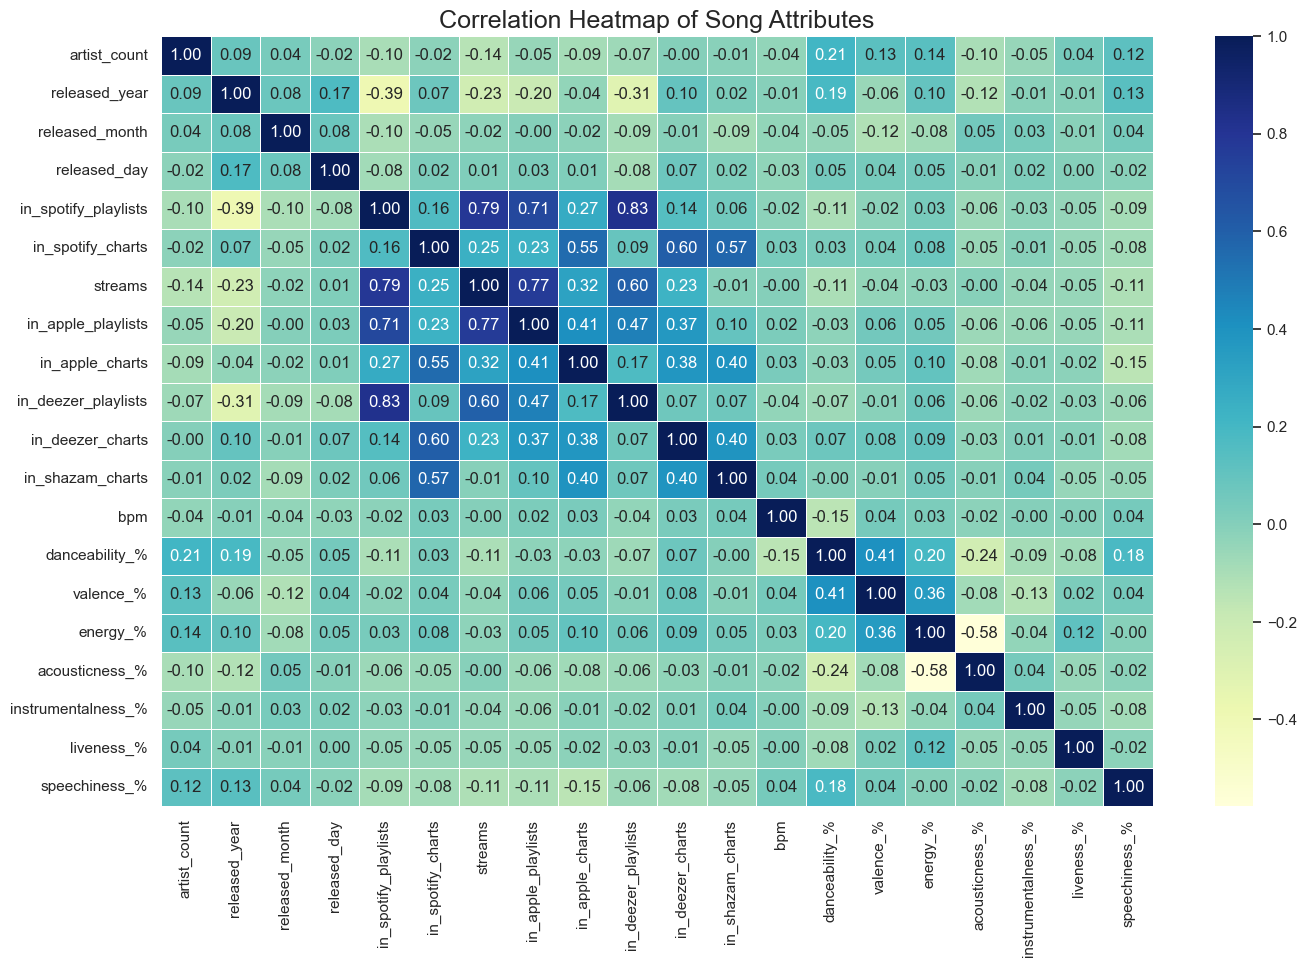

In [37]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Song Attributes', fontsize=18)
plt.show()

Here are a few insights from the heatmap:

- Streams and Platform Presence: There are moderate to high positive correlations between the number of streams and the presence of songs on different platform charts (Spotify, Apple Music, Deezer). This trend is expected because songs that are streamed more frequently are likely to be featured on these platforms' charts.

- Song Attributes and Popularity: Variables like 'danceability_%', 'valence_%', and 'energy_%' don't show a strong correlation with the number of streams or presence on charts. This observation suggests that while these characteristics contribute to a song's makeup, they may not directly influence its popularity.

- Release Timing: The 'released_year', 'released_month', and 'released_day' have very low correlations with most other variables. This result might imply that the release timing doesn't have a significant impact on a song's streaming numbers or presence in charts, at least not in this dataset.

- Artist Count: The 'artist_count' shows low to negligible correlation with most attributes and popularity metrics. This finding suggests that the number of artists contributing to a song doesn't necessarily impact its success.

- Song Attributes Inter-correlation: Some song attributes are moderately correlated with each other. For example, 'energy_%' and 'danceability_%' are somewhat positively correlated, which makes sense because more energetic songs are often more danceable.






#### 2. Trends over time

Conducting a temporal analysis can provide valuable insights into trends over time. Given the nature of your data, several interesting questions arise:

- Trends in Song Attributes Over Time: How have certain song attributes (like energy, valence, danceability, etc.) trended over the years? Are songs becoming more energetic, danceable, etc.?

- Popularity Trends: Are there observable trends in song streams or presence in charts over different time periods? This can help identify if certain periods favor song popularity.

- Seasonal Patterns: Are there certain times of the year when songs tend to be more successful or possess certain attributes?

Let's start with the trends in song attributes over the years.

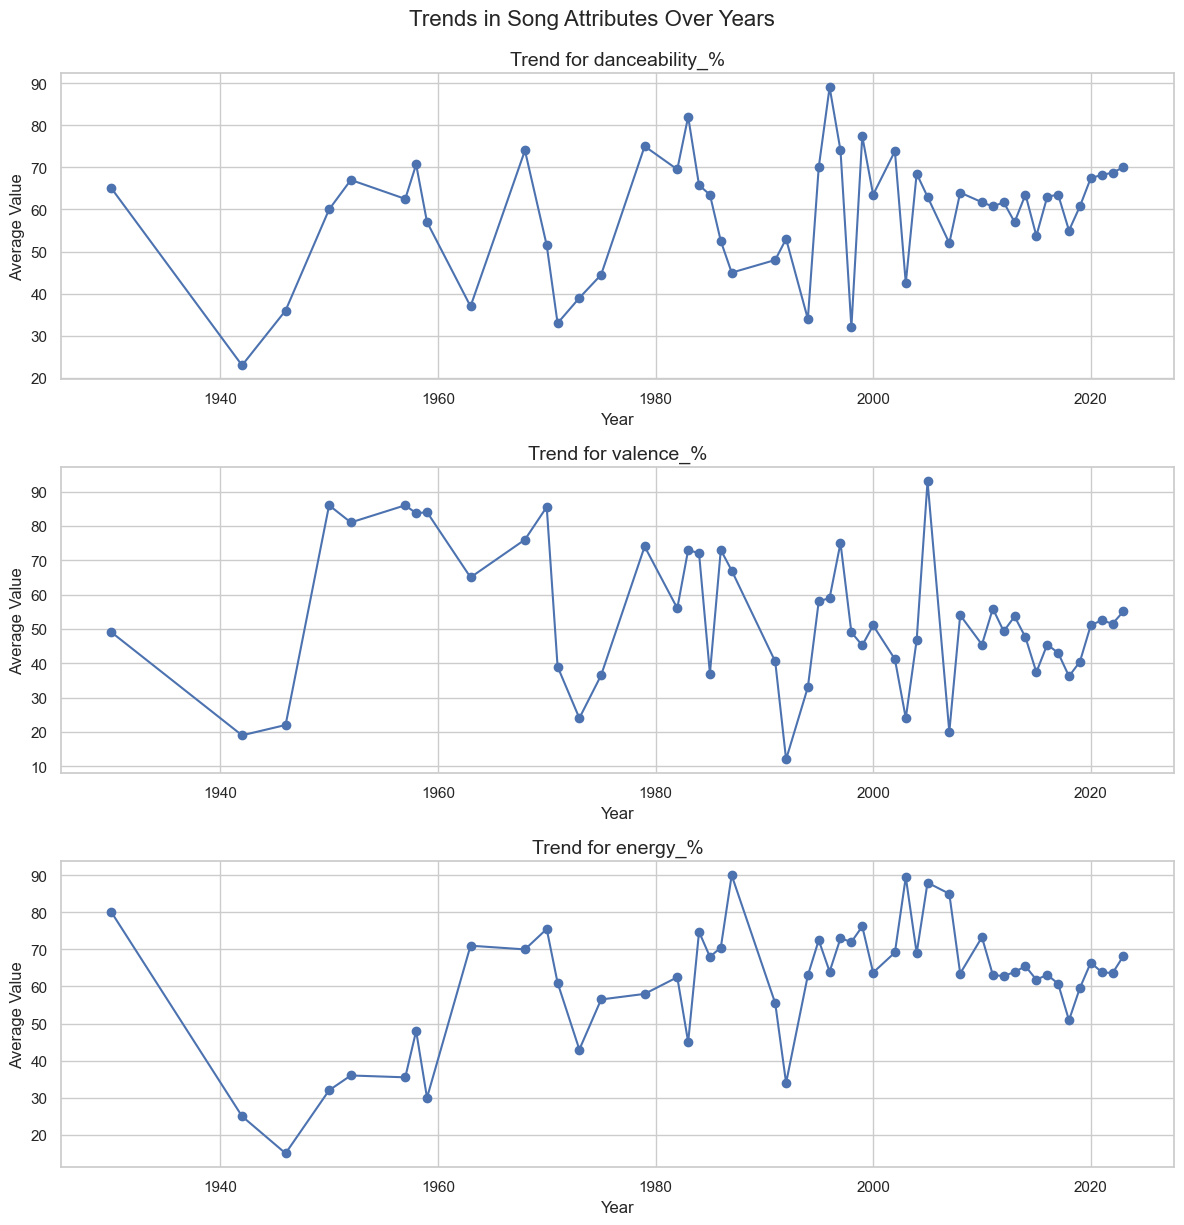

In [38]:
# Group the data by release year and calculate the mean of the numerical columns
yearly_trends = df_cleaned.groupby('released_year').mean()

# Define a function to create individual plots for each attribute
def plot_attribute_trends(attributes, data, title):
    # Create a separate plot for each attribute
    num_attributes = len(attributes)
    fig, axes = plt.subplots(num_attributes, 1, figsize=(12, 4 * num_attributes))

    for i, attribute in enumerate(attributes):
        ax = axes[i] if num_attributes > 1 else axes
        ax.plot(data.index, data[attribute], marker='o', linestyle='-')
        ax.set_title(f'Trend for {attribute}', fontsize=14)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Average Value', fontsize=12)
        ax.grid(True)

    # Adjust the layout and set the main title
    plt.tight_layout()
    fig.suptitle(title, fontsize=16, y=1.02)  # y=1.02 provides space between the main title and the subplots
    plt.show()

# Selecting attributes related to song characteristics
song_attributes = ['danceability_%', 'valence_%', 'energy_%']

# Plotting the trends for song attributes
plot_attribute_trends(song_attributes, yearly_trends, 'Trends in Song Attributes Over Years')

The graphs above display clearer trends for individual song attributes: 'danceability', 'valence', and 'energy', each plotted against the release year.

- Danceability: This attribute seems to fluctuate over the years, indicating varying trends in how suitable tracks are for dancing. Noticing specific peaks and troughs could lead to further investigation into the types of songs or influential artists during those years.

- Valence: The trend in 'valence' seems to have its own distinct peaks and valleys, reflecting the changing musical content's positivity. This could be influenced by cultural, social, or global events that affect the music industry's emotional content.

- Energy: Similar to 'danceability', 'energy' has fluctuations that could be significant when correlated with external events or shifts in musical preferences.


Now, we'll focus on the popularity aspect, specifically analyzing the 'streams' metric over the years. This will help us understand trends in how widely songs have been listened to, which is a direct indicator of their popularity.

### 2.8. Questions answered 

By focusing on specific questions, we can perform targeted exploratory data analysis (EDA) that yields more insightful information. This method often involves using techniques like grouping, aggregating, and visualizing data to uncover underlying patterns and insights.

#### 1.	Top 10 songs with the most streams.

In [39]:
# Sorting the dataframe by the 'streams' column in descending order and getting the top 10 songs
top_10_songs = df_cleaned.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]

# Displaying the top 10 songs with the most streams
top_10_songs

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


#### 2.	What year has the most streamed songs

In [40]:
# Grouping the data by 'release_year' and calculating the total number of streams for each year
yearly_streams = df_cleaned.groupby('released_year')['streams'].sum().reset_index()

# Identifying the year with the highest total number of streams
most_streamed_year = yearly_streams.loc[yearly_streams['streams'].idxmax()]

# Display the year along with the total streams
most_streamed_year

released_year    2.022000e+03
streams          1.164024e+11
Name: 48, dtype: float64

#### 3.	What is the distribution of presence in playlists on different platforms?

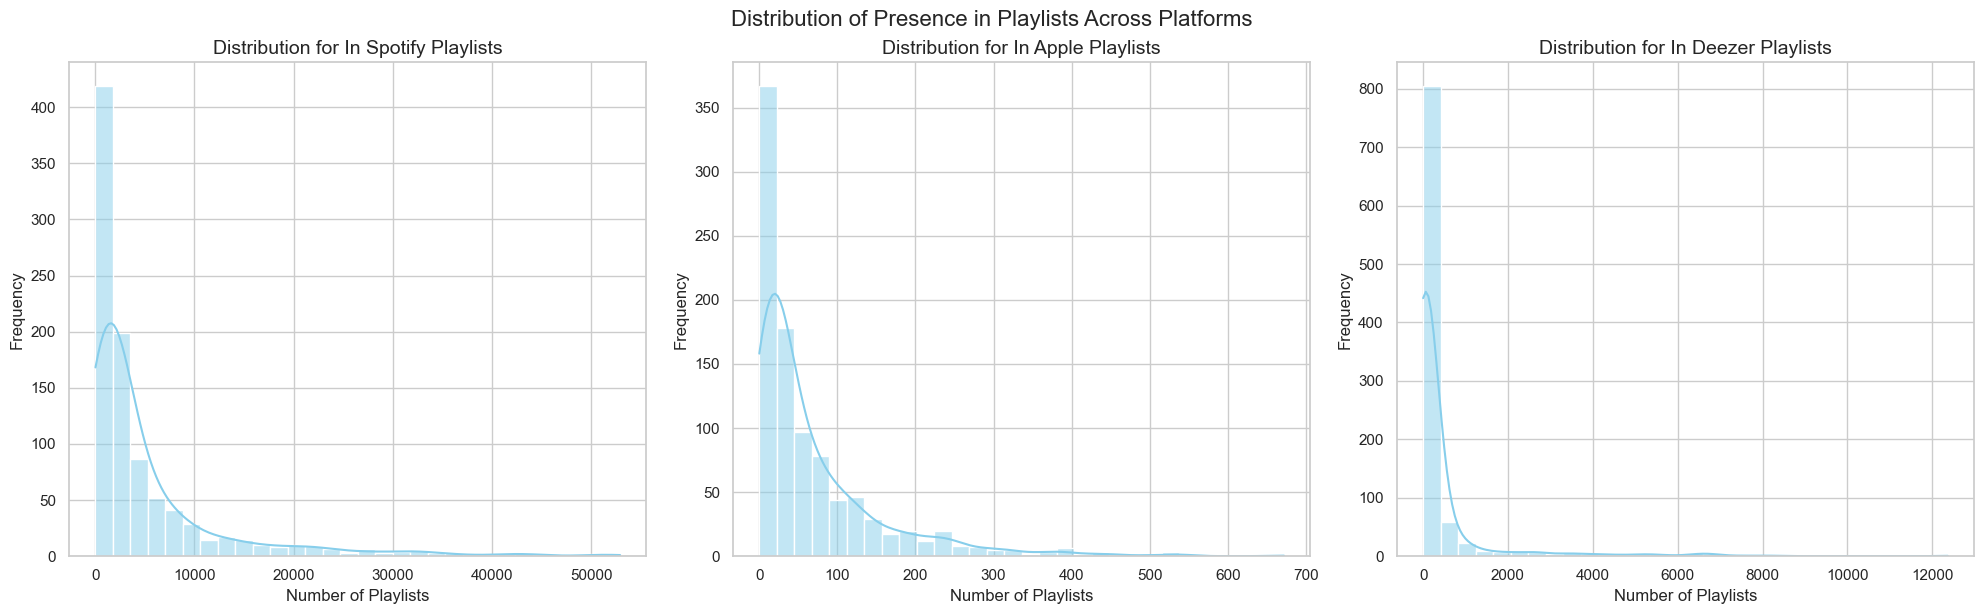

In [41]:
# Columns representing the presence in playlists across different platforms
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Data for the distribution
playlist_distribution = df_cleaned[playlist_columns]

# Creating a plot for each platform's playlist distribution
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, column in enumerate(playlist_columns):
    sns.histplot(data=playlist_distribution, x=column, bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution for {column.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Number of Playlists', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjusting the layout and setting the main title
plt.tight_layout()
fig.suptitle('Distribution of Presence in Playlists Across Platforms', fontsize=16, y=1.02)
plt.show()

Here are some insights from these distributions:

- Spotify: The distribution for Spotify shows that most songs are present in a relatively low number of playlists, with a steep drop as the number increases. This pattern suggests that while many songs make it to a few playlists, only a select few are featured in numerous playlists.

- Apple Music: Similar to Spotify, most songs on Apple Music are featured in a lower number of playlists. The distribution indicates that it's uncommon for songs to be present in a large number of playlists.

- Deezer: The pattern for Deezer is also quite similar, with many songs appearing in fewer playlists and a rapid decline in frequency as the number of playlists increases.

These trends could be indicative of the platforms' playlist curation habits, with a preference for a diverse range of songs spread across various playlists rather than heavily concentrating on certain tracks. The patterns could also reflect user behavior and preferences on these platforms.



#### 4.	What is the distribution of chart presence on different platforms?

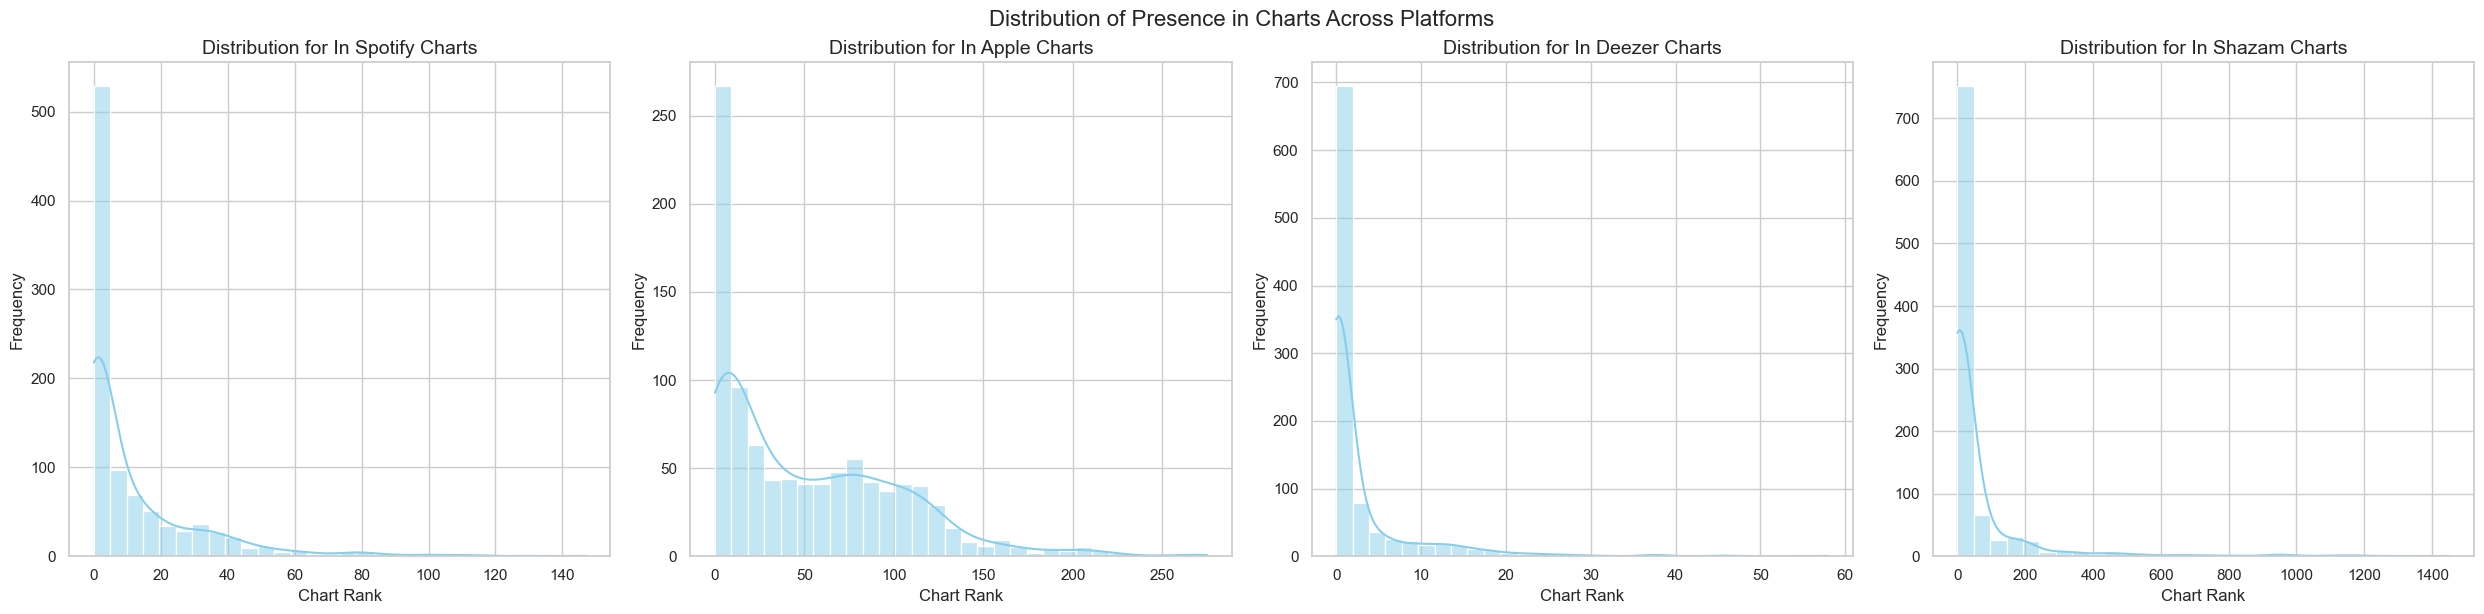

In [42]:
# Columns representing the presence in charts across different platforms
chart_columns = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']

# Data for the distribution
chart_distribution = df_cleaned[chart_columns]

# Creating a plot for each platform's chart distribution
fig, axes = plt.subplots(1, 4, figsize=(25, 6))

for i, column in enumerate(chart_columns):
    sns.histplot(data=chart_distribution, x=column, bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution for {column.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Chart Rank', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjusting the layout and setting the main title
plt.tight_layout()
fig.suptitle('Distribution of Presence in Charts Across Platforms', fontsize=16, y=1.02)
plt.show()

Here are some insights from these distributions:

- Spotify: Most songs on Spotify charts are ranked lower, with very few reaching the top positions. This could indicate a highly competitive environment where only a few songs dominate the top spots.

- Apple Music: Similar to Spotify, Apple Music features a larger number of songs in lower-ranking positions, suggesting that while many tracks are present on the charts, few attain the highest rankings.

- Deezer: The Deezer chart shows a somewhat even distribution but still leans towards lower rankings for most songs. This pattern suggests that while there's a variety of music represented, top positions are still hard to achieve.

- Shazam: The distribution for Shazam is slightly different, with a more noticeable concentration in the mid-ranking section. Since Shazam charts are often influenced by user interactions (like song identifications), this might reflect a broader diversity of music getting attention.


#### 5.	Which artist has the most songs in the dataset?

In [43]:
# Counting the number of songs by each artist
artist_counts = df_cleaned['artist(s)_name'].value_counts().reset_index()

# Renaming columns for clarity
artist_counts.columns = ['Artist', 'Number of Songs']

# Getting the artist with the most songs
most_songs_artist = artist_counts.iloc[0]

most_songs_artist

Artist             Taylor Swift
Number of Songs              34
Name: 0, dtype: object

The artist with the most songs in the dataset is Taylor Swift, with a total of 34 songs


#### 6.	Which songs have the highest and lowest bpm?

In [44]:
# Finding the song with the highest BPM
highest_bpm_song = df_cleaned.loc[df_cleaned['bpm'].idxmax(), ['track_name', 'artist(s)_name', 'bpm']]

# Finding the song with the lowest BPM
lowest_bpm_song = df_cleaned.loc[df_cleaned['bpm'].idxmin(), ['track_name', 'artist(s)_name', 'bpm']]

highest_bpm_song, lowest_bpm_song

(track_name               Lover
 artist(s)_name    Taylor Swift
 bpm                        206
 Name: 100, dtype: object,
 track_name        Love Language
 artist(s)_name              SZA
 bpm                          65
 Name: 456, dtype: object)

- The song with the highest BPM in the dataset is "Lover" by Taylor Swift, with a tempo of 206 beats per minute, indicating a very fast-paced track.

- Conversely, the song with the lowest BPM is "Love Language" by SZA, with a tempo of 65 beats per minute, suggesting a much slower, possibly more relaxed or introspective musical piece.

These songs represent the extremes of the tempo spectrum in this collection of music, demonstrating the variety of musical pacing and styles that artists use to convey different emotions and energy levels.


#### 7.	Do songs with higher 'danceability_%' tend to have more streams?

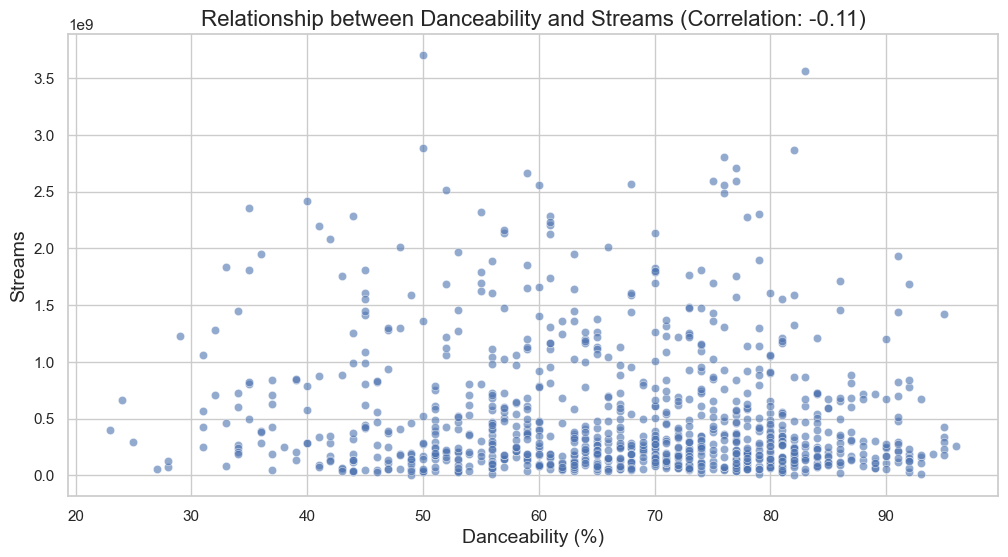

-0.10540632343520451

In [45]:
# Calculate the correlation between 'danceability_%' and 'streams'
danceability_streams_corr = df_cleaned['danceability_%'].corr(df_cleaned['streams'])

# Create a scatter plot to visualize the relationship between 'danceability_%' and 'streams'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='danceability_%', y='streams', data=df_cleaned, alpha=0.6)
plt.title(f'Relationship between Danceability and Streams (Correlation: {danceability_streams_corr:.2f})', fontsize=16)
plt.xlabel('Danceability (%)', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.grid(visible=True)
plt.show()

# Returning the correlation value for reference
danceability_streams_corr

The correlation between 'danceability_%' and 'streams' is approximately -0.11, indicating a slight negative correlation between the two variables. This suggests that, contrary to what might be expected, songs with higher danceability do not necessarily tend to have more streams.

This finding could be due to various factors, including listeners' diverse preferences for different types of music in different contexts (not just music that is danceable). Additionally, other factors such as marketing, artist popularity, and playlist placements likely play significant roles in influencing the number of streams a song garners.

#### 8.	Distribution of 'key' and 'mode'

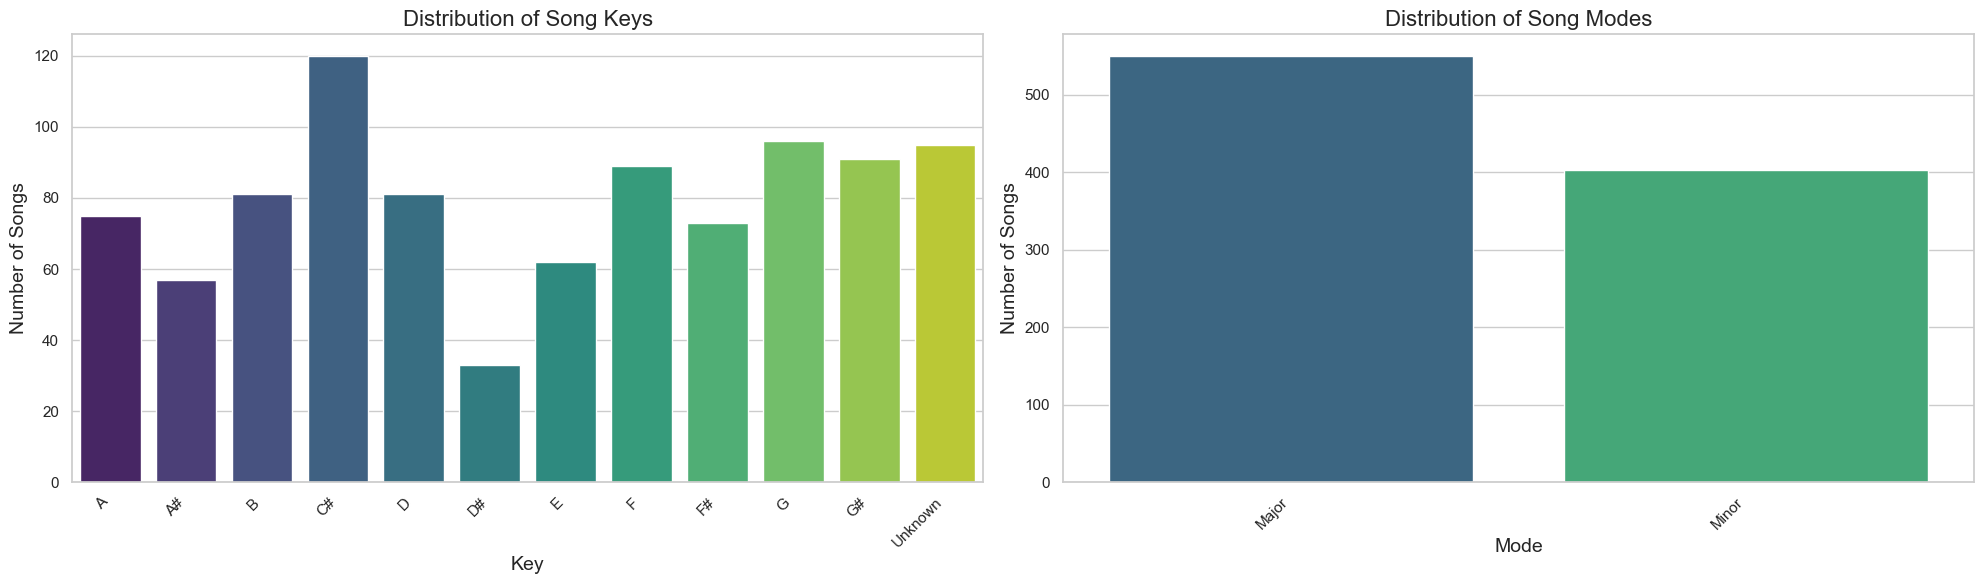

In [46]:
# Preparing data for the 'key' distribution
key_distribution = df_cleaned['key'].value_counts()

# Preparing data for the 'mode' distribution
mode_distribution = df_cleaned['mode'].value_counts()

# Creating bar plots for 'key' and 'mode' distributions
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Bar plot for 'key' distribution
sns.barplot(ax=axes[0], x=key_distribution.index, y=key_distribution.values, palette='viridis')
axes[0].set_title('Distribution of Song Keys', fontsize=16)
axes[0].set_xlabel('Key', fontsize=14)
axes[0].set_ylabel('Number of Songs', fontsize=14)

# Bar plot for 'mode' distribution
sns.barplot(ax=axes[1], x=mode_distribution.index, y=mode_distribution.values, palette='viridis')
axes[1].set_title('Distribution of Song Modes', fontsize=16)
axes[1].set_xlabel('Mode', fontsize=14)
axes[1].set_ylabel('Number of Songs', fontsize=14)

# Rotate the x labels for better readability
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjusting the layout
plt.tight_layout()
plt.show()

The bar charts above illustrate the distribution of musical 'key' and 'mode' within the dataset, providing insights into the variety and commonality of these musical elements in the dataset's songs.

- Key Distribution: The chart shows that some keys are more prevalent than others. For instance, there's a noticeable preference for certain keys, while others are less common. These trends might be influenced by various factors, including the genre of music, the artists' preferences, and even the cultural context of the music.

- Mode Distribution: The chart for musical modes indicates a higher number of songs in a particular mode (most likely the 'Major' mode, given its prevalence in popular music for its generally upbeat and bright sound). The other mode, typically 'Minor', is known for producing a darker or sadder sound and is less represented.

These insights can be particularly interesting for musicologists, artists, and producers as they reflect not only artistic choices but also listener preferences and cultural inclinations in music production and consumption.


#### 9.	Are danceability and energy and liveness related?

If these attributes are significantly correlated, it may suggest that songs that are more danceable also tend to be more energetic and lively, or vice versa.

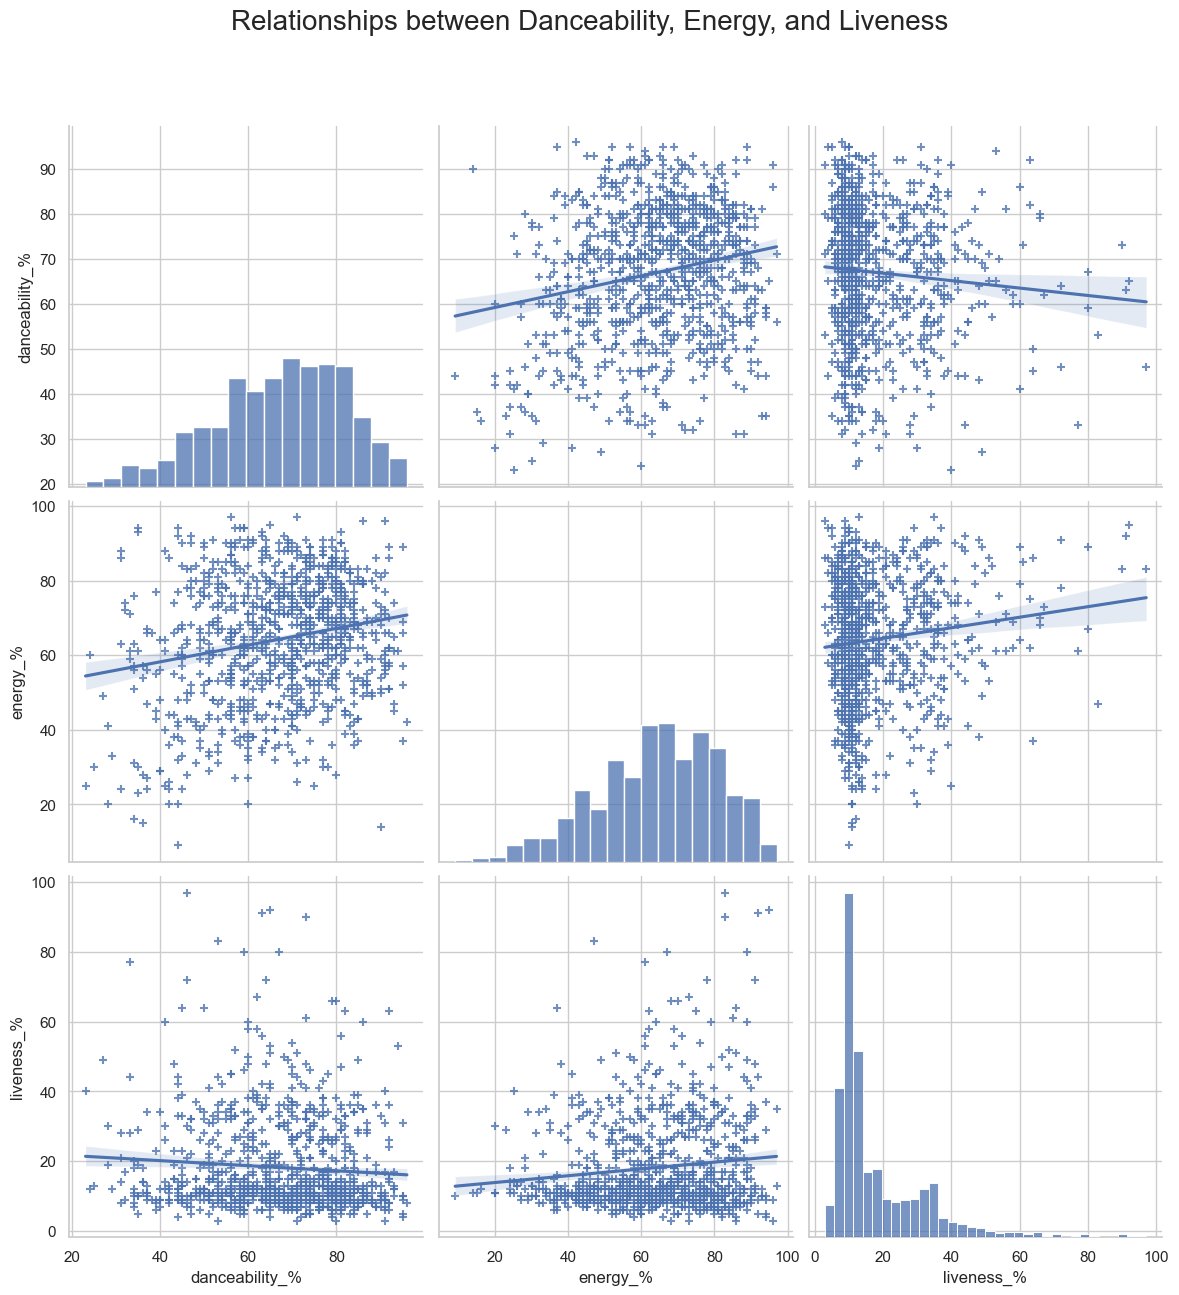

,danceability_%,energy_%,liveness_%
danceability_%,1.000000,0.198095,-0.077538
energy_%,0.198095,1.000000,0.117302
liveness_%,-0.077538,0.117302,1.000000


In [47]:
# Selecting the features to correlate
features = ['danceability_%', 'energy_%', 'liveness_%']

# Calculating the correlation matrix between the selected features
correlation_matrix = df_cleaned[features].corr()

# Preparing to plot pairwise relationships and regression lines
sns.set(style="whitegrid")  # Setting the aesthetic style of the plots
pair_plot = sns.pairplot(df_cleaned[features], kind="reg", markers="+", height=4)

# Adding a title
pair_plot.fig.suptitle('Relationships between Danceability, Energy, and Liveness', y=1.08, fontsize=20)

# Displaying the plots
plt.show()

# Returning the correlation matrix for reference
correlation_matrix

The scatter plots above, complemented by the regression lines, visualize the relationships between 'danceability', 'energy', and 'liveness'. The correlation matrix quantifies these relationships. Here's what we can interpret from the data:

- Danceability and Energy (Correlation: 0.20): There's a slight positive correlation between danceability and energy, suggesting that more danceable tracks tend to have a bit more energy. However, the correlation is not very strong, indicating that there are certainly energetic tracks that aren't necessarily danceable, and vice versa.

- Danceability and Liveness (Correlation: -0.08): There's a negligible negative correlation between danceability and liveness, suggesting no significant relationship between the two. This indicates that a song's danceability doesn't necessarily relate to the presence of live elements or a live audience's energy.

- Energy and Liveness (Correlation: 0.12): There's a slight positive correlation between energy and liveness, suggesting that songs with more energy might have a slightly higher tendency to contain elements of live performance. However, this correlation is also weak, indicating many exceptions to this trend.

Overall, while there are slight tendencies and correlations between these musical attributes, they are not strong enough to dictate a consistent pattern across all songs. This diversity reflects the wide range of music styles and production choices in the dataset.


#### 10.	Is there a relationship between the number of artists in a song and its popularity (e.g., streams, presence in playlists)?

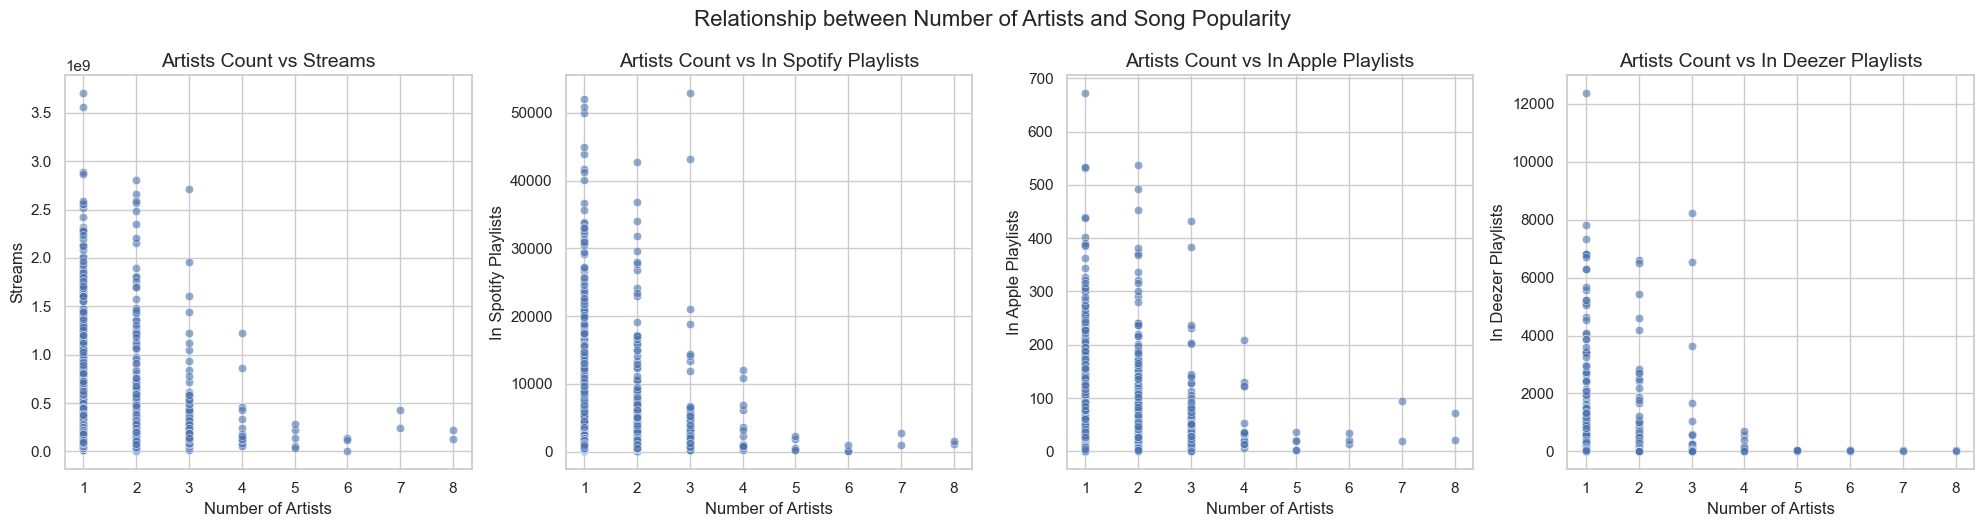

streams                -0.136436
in_spotify_playlists   -0.101966
in_apple_playlists     -0.051074
in_deezer_playlists    -0.071506
Name: artist_count, dtype: float64

In [48]:
# Features representing popularity
popularity_features = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Adding 'artist_count' to the list for correlation calculation
features_for_correlation = ['artist_count'] + popularity_features

# Calculating the correlation matrix between 'artist_count' and the popularity features
artist_popularity_corr = df_cleaned[features_for_correlation].corr()

# Extracting the specific correlations between 'artist_count' and the popularity indicators
artist_popularity_relationship = artist_popularity_corr.loc['artist_count', popularity_features]

# Creating scatter plots to visualize the relationships
fig, axes = plt.subplots(1, len(popularity_features), figsize=(20, 5))

for i, feature in enumerate(popularity_features):
    sns.scatterplot(ax=axes[i], data=df_cleaned, x='artist_count', y=feature, alpha=0.6)
    axes[i].set_title(f'Artists Count vs {feature.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Number of Artists', fontsize=12)
    axes[i].set_ylabel(feature.replace("_", " ").title(), fontsize=12)
    axes[i].grid(visible=True)

# Adjusting the layout and setting the main title
plt.tight_layout()
fig.suptitle('Relationship between Number of Artists and Song Popularity', fontsize=16, y=1.05)
plt.show()

# Returning the correlation values for reference
artist_popularity_relationship

The scatter plots above visualize the relationships between the number of artists in a song and various indicators of song popularity. The calculated correlations between these variables are as follows:

- Number of Artists vs. Streams: The correlation is approximately -0.14, indicating a slight negative relationship. This suggests that songs with more artists do not necessarily tend to have more streams.

- Number of Artists vs. Presence in Spotify Playlists: The correlation is approximately -0.10, again showing a slight negative relationship. This implies that having more artists on a track doesn't necessarily mean the song will be in more Spotify playlists.

- Number of Artists vs. Presence in Apple Music Playlists: The correlation is approximately -0.05, which is very weak, suggesting almost no relationship between the number of artists and the song's presence in Apple Music playlists.

- Number of Artists vs. Presence in Deezer Playlists: The correlation is approximately -0.07, indicating a very weak negative relationship. This suggests that a higher number of artists on a song does not necessarily increase its likelihood of being included in Deezer playlists.

Overall, these insights suggest that the presence of multiple artists on a track does not guarantee higher streams or presence in playlists across various platforms. This could be due to various factors, including the nature of collaboration, the marketing strategies employed for different songs, the fanbase of the artists involved, and listeners' preferences.


#### 11.	How do song attributes (e.g., valence, energy) correlate with the song's success?

In [49]:
# Features representing song attributes
song_attributes = ['valence_%', 'energy_%', 'danceability_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Features representing song success
success_indicators = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Combining the lists for correlation calculation
features_for_correlation = song_attributes + success_indicators

# Calculating the correlation matrix
attributes_success_corr = df_cleaned[features_for_correlation].corr()

# Extracting correlations between song attributes and success indicators
attributes_success_relationship = attributes_success_corr.loc[song_attributes, success_indicators]

# Displaying the correlation results for reference
attributes_success_relationship

,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
valence_%,-0.040810,-0.021883,0.057075,-0.013859
energy_%,-0.026050,0.033808,0.052615,0.064865
danceability_%,-0.105406,-0.106534,-0.025326,-0.071489
acousticness_%,-0.004483,-0.064421,-0.061781,-0.063282
instrumentalness_%,-0.044902,-0.028134,-0.057219,-0.016973
liveness_%,-0.048337,-0.046695,-0.049596,-0.026743
speechiness_%,-0.112302,-0.089722,-0.108011,-0.062274


The table above shows the correlation between various song attributes and indicators of a song's success. Each entry in the table is a correlation coefficient between -1 and 1, representing the strength and direction of the relationship between two variables. Here's what we can interpret from the data:

1. Valence:

    - Streams: Slight negative correlation (-0.04), indicating that higher valence (more positive or happier music) does not necessarily relate to more streams.
    - In playlists: Very weak correlations with presence in playlists, suggesting that valence does not significantly affect playlist inclusion.

2. Energy:

    - Streams: Negligible correlation (-0.03), suggesting no significant relationship between a song's energy level and its number of streams.
    - In playlists: Slight positive correlations with presence in playlists (around 0.03 to 0.06), especially in Deezer playlists, implying that songs with more energy might be slightly more likely to be included in playlists.

3. Danceability:

    - Streams: Moderate negative correlation (-0.11), indicating that more danceable tracks are not necessarily streamed more.
    - In playlists: Similar trends as streams, especially for Spotify playlists.

4. Acousticness, Instrumentalness, Liveness, and Speechiness:

    - These attributes show very weak to weak negative correlations with both streams and presence in playlists, suggesting that they do not significantly influence a song's streaming numbers or likelihood of being included in playlists.

Overall, it appears that these specific musical attributes do not have strong correlations with the chosen indicators of a song's success. This outcome suggests that while these characteristics contribute to a song's unique sound and feel, other factors (like marketing, artist popularity, and listener preferences) play a more critical role in determining its commercial success.


#### 12.	Are certain keys or modes more prevalent in highly streamed songs?

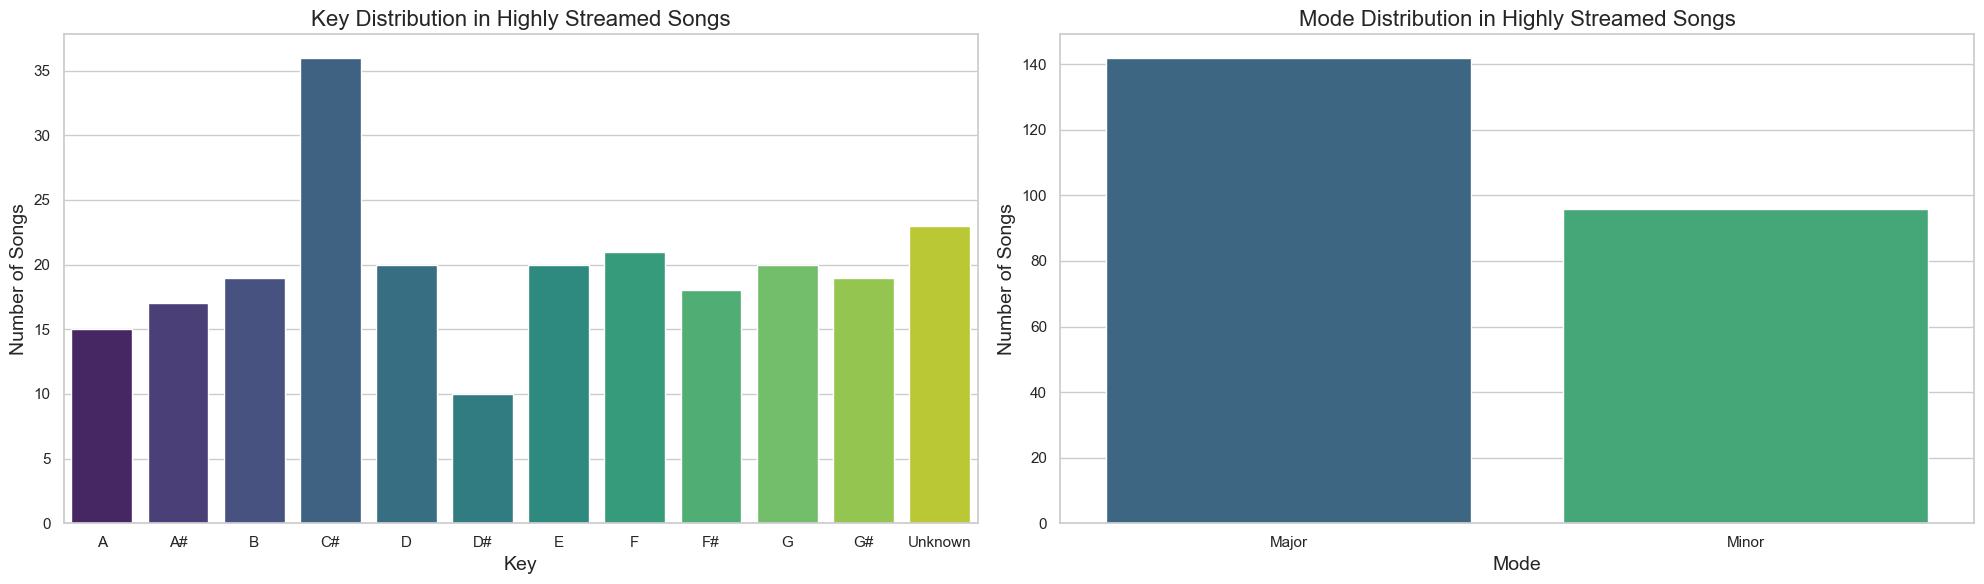

(C#         36
 Unknown    23
 F          21
 D          20
 E          20
 G          20
 B          19
 G#         19
 F#         18
 A#         17
 A          15
 D#         10
 Name: key, dtype: int64,
 Major    142
 Minor     96
 Name: mode, dtype: int64)

In [50]:
# Step 1: Identifying highly streamed songs
# Defining the threshold as the 75th percentile of the 'streams' column
high_stream_threshold = df_cleaned['streams'].quantile(0.75)

# Filtering the songs that have streams above the 75th percentile
highly_streamed_songs = df_cleaned[df_cleaned['streams'] > high_stream_threshold]

# Step 2: Analyzing keys and modes in highly streamed songs
# Counting the occurrences of each key and mode in these songs
key_distribution_high_streams = highly_streamed_songs['key'].value_counts()
mode_distribution_high_streams = highly_streamed_songs['mode'].value_counts()

# Creating visualizations for the distributions
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for key distribution
sns.barplot(ax=axes[0], x=key_distribution_high_streams.index, y=key_distribution_high_streams.values, palette='viridis')
axes[0].set_title('Key Distribution in Highly Streamed Songs', fontsize=16)
axes[0].set_xlabel('Key', fontsize=14)
axes[0].set_ylabel('Number of Songs', fontsize=14)

# Plot for mode distribution
sns.barplot(ax=axes[1], x=mode_distribution_high_streams.index, y=mode_distribution_high_streams.values, palette='viridis')
axes[1].set_title('Mode Distribution in Highly Streamed Songs', fontsize=16)
axes[1].set_xlabel('Mode', fontsize=14)
axes[1].set_ylabel('Number of Songs', fontsize=14)

# Adjusting the layout and labels
plt.tight_layout()
plt.show()

# Returning the counts for reference
key_distribution_high_streams, mode_distribution_high_streams

The bar charts above depict the distribution of musical keys and modes among songs that are highly streamed (above the 75th percentile in stream numbers).

- <b>Key Distribution in Highly Streamed Songs</b>: The chart shows that the key of "C#" is the most common among highly streamed songs, followed by keys like "F", "E", "D", and "G". There's a relatively even distribution among several keys, suggesting that no single key dominates when it comes to high streaming numbers. However, it's interesting to note that certain keys (like "C#", "F", and "G") seem to be more common in popular tracks.

- <b>Mode Distribution in Highly Streamed Songs</b>: The majority of highly streamed songs are in the "Major" mode, known for a generally happier, brighter sound. The "Minor" mode, often associated with a more serious, melancholic sound, is less common. This could suggest that listeners might gravitate towards tracks with a more upbeat, major-key sound when engaging in streaming.

These insights can be particularly useful for artists, producers, and music marketers in understanding listener preferences and trends in music consumption on streaming platforms. However, it's important to note that musical key and mode are just parts of what makes a song appealing to listeners; other factors like melody, lyrics, production quality, and artist popularity also play crucial roles.



#### 13.	Does the time of year (e.g., summer, winter) affect a song's characteristics or popularity?

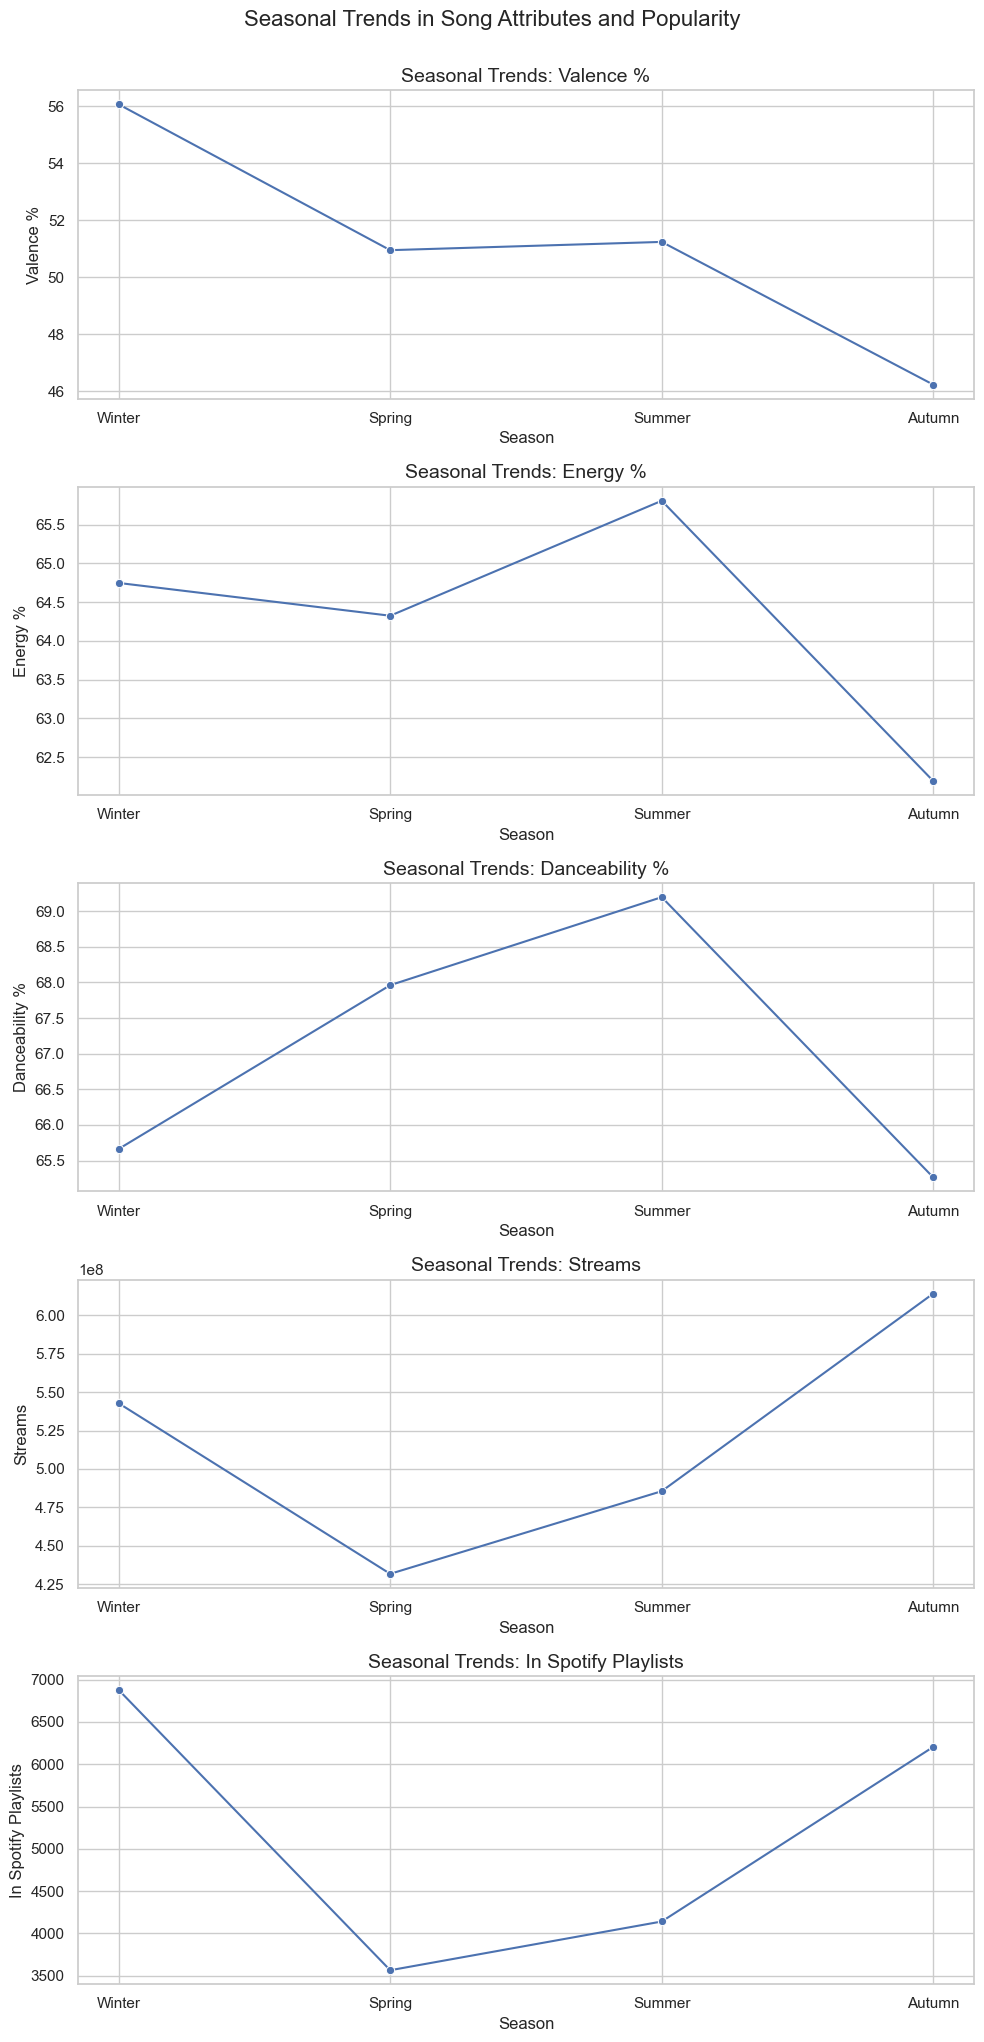

,valence_%,energy_%,danceability_%,streams,in_spotify_playlists
season,,,,,
Winter,56.074074,64.748148,65.662963,5.427142e+08,6878.485185
Spring,50.957143,64.325000,67.960714,4.318064e+08,3565.050000
Summer,51.247423,65.809278,69.195876,4.855516e+08,4141.185567
Autumn,46.239234,62.191388,65.263158,6.140543e+08,6205.377990


In [51]:
import calendar

# Function to categorize a month into a season
def month_to_season(month):
    # Defining seasons in a way applicable globally, considering the dataset doesn't specify a region
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Categorizing each song into a season based on its release month
df_cleaned['season'] = df_cleaned['released_month'].apply(lambda x: month_to_season(x))

# Selecting song attributes and success metrics for analysis
attributes_and_success = ['valence_%', 'energy_%', 'danceability_%', 'streams', 'in_spotify_playlists']

# Grouping the data by season and calculating the mean for the selected metrics
seasonal_trends = df_cleaned.groupby('season')[attributes_and_success].mean()

# Reordering the index to reflect the actual seasonal order
seasonal_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_trends = seasonal_trends.reindex(seasonal_order)

# Creating a plot for each attribute and success metric
fig, axes = plt.subplots(len(attributes_and_success), 1, figsize=(10, 20))

for i, feature in enumerate(attributes_and_success):
    sns.lineplot(ax=axes[i], data=seasonal_trends, x=seasonal_trends.index, y=feature, marker='o')
    axes[i].set_title(f'Seasonal Trends: {feature.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('Season', fontsize=12)
    axes[i].set_ylabel(feature.replace("_", " ").title(), fontsize=12)

# Adjusting the layout and setting the main title
plt.tight_layout()
fig.suptitle('Seasonal Trends in Song Attributes and Popularity', fontsize=16, y=1.02)
plt.show()

# Returning the grouped data for reference
seasonal_trends

The line charts depict seasonal trends in various song attributes and success metrics, showing how these aspects vary with the seasons - Winter, Spring, Summer, and Autumn. Here's what we can interpret from the data:

- Valence: There's a noticeable dip in valence during the Autumn, suggesting that songs released during this season might be less 'happy' or 'positive' compared to other seasons. This could be due to artists releasing more mellow or emotionally complex music in the Autumn.

- Energy: Energy seems to peak during the Summer and is lowest in the Autumn. This trend aligns with the notion that upbeat, energetic songs might be more popular in the Summer, possibly contributing to summer hits that complement the season's lively spirit.

- Danceability: Danceability appears to be higher in the Summer, suggesting that more danceable tracks might be released or become popular during this season, perhaps in sync with summer festivities and outdoor concerts.

- Streams: Interestingly, streams peak significantly in the Autumn. This could be related to various factors, including major artists choosing to release music during this season to prepare for year-end charting and award nominations, or listeners engaging more with music platforms as they spend more time indoors.

- Presence in Spotify Playlists: Similar to streams, the presence in Spotify playlists is higher in the Winter and Autumn, indicating seasonal preferences or promotional strategies that favor these periods.

These trends suggest that the music industry and listeners' preferences do indeed change with the seasons, affecting the type of music that becomes popular at different times of the year. Understanding these patterns can be particularly valuable for artists, producers, and record labels in planning releases and marketing strategies.


#### 14.	What are the common characteristics of the top 10 most successful artists in the dataset?

In [52]:
# Aggregating data by artist and summing up their success metrics (streams, presence in playlists)
artist_success = df_cleaned.groupby('artist(s)_name').agg({
    'streams': 'sum',
    'in_spotify_playlists': 'sum',
    'in_apple_playlists': 'sum',
    'in_deezer_playlists': 'sum'
})

# Adding a column for total presence in playlists as a measure of success
artist_success['total_playlist_presence'] = artist_success[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Identifying the top 10 artists based on streams and playlist presence
top_10_artists_streams = artist_success.nlargest(10, 'streams')
top_10_artists_playlists = artist_success.nlargest(10, 'total_playlist_presence')

# Since we're analyzing common characteristics, we'll create a combined set of unique top artists from both categories
unique_top_artists = set(top_10_artists_streams.index).union(set(top_10_artists_playlists.index))

# Filtering the original data for songs by these top artists
top_artists_data = df_cleaned[df_cleaned['artist(s)_name'].isin(unique_top_artists)]

# Analyzing common characteristics by averaging the musical attributes of the top artists' songs
common_characteristics = top_artists_data.groupby('artist(s)_name')[song_attributes].mean()

# For better readability and comparison, we'll sort the artists by their total number of streams
sorted_top_artists = artist_success.loc[unique_top_artists].nlargest(len(unique_top_artists), 'streams')
common_characteristics = common_characteristics.reindex(sorted_top_artists.index)

common_characteristics

,valence_%,energy_%,danceability_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,
The Weeknd,42.272727,63.909091,57.681818,20.590909,1.409091,19.681818,7.863636
Taylor Swift,35.558824,56.794118,59.764706,27.882353,0.676471,15.411765,7.382353
Ed Sheeran,51.333333,64.777778,69.666667,28.888889,0.000000,16.333333,5.000000
Harry Styles,54.000000,58.882353,61.352941,42.823529,1.588235,14.294118,5.352941
Bad Bunny,53.210526,66.736842,75.157895,22.842105,3.315789,18.157895,9.842105
...,...,...,...,...,...,...,...
Imagine Dragons,59.000000,73.666667,62.333333,8.666667,0.000000,19.333333,7.000000
Adele,41.750000,63.500000,61.750000,20.000000,0.000000,8.500000,3.500000
Coldplay,26.666667,44.333333,47.333333,52.333333,1.666667,10.666667,2.666667


The table above displays the average musical characteristics of songs by the most successful artists in the dataset, sorted by their total number of streams. Here's what we can interpret from these artists' common characteristics:

- Valence: Most artists have songs with moderate to low valence, indicating that successful tracks do not necessarily have to be 'happy' or 'positive'. Artists like Taylor Swift, Olivia Rodrigo, and Coldplay tend to release songs with lower valence.

- Energy: There's a wide range in energy levels, though many successful artists tend to have moderately energetic songs. Artists like Avicii, Imagine Dragons, and Bad Bunny have higher energy music.

- Danceability: Successful artists often have songs with moderate to high danceability. Notably, artists like Eminem, Bad Bunny, and Ed Sheeran have tracks that are quite danceable.

- Acousticness: There's significant variation in acousticness among these artists. Olivia Rodrigo and Coldplay lean more towards acoustic sounds, while Avicii and Eminem have very low acousticness, indicating more electronic or processed sound.

- Instrumentalness: Most top artists have low instrumentalness in their tracks, suggesting that vocal content is prominent in their music.

- Liveness: The liveness attribute is relatively low for all artists, indicating few live track releases among these top artists.

- Speechiness: Artists like Eminem and Dr. Dre, Snoop Dogg have higher speechiness levels, which is expected given their genre. Most others have low speechiness, indicating less spoken content in their tracks.

These insights suggest that while there's a diversity in musical styles among successful artists, certain characteristics might be more appealing to listeners, contributing to an artist's success. Moderate to high danceability, moderate energy, and a focus on vocal content (low instrumentalness and variable speechiness) could be factors that resonate more with wider audiences.


#### 15.	Is there a trend in song attributes over the years (e.g., are songs getting faster, happier, more danceable)?

We'll create line plots for these trends as they're effective in showing changes over time. Specifically, we'll look at the following attributes:

1. BPM (Beats Per Minute): to see if songs are getting faster or slower.
2. Danceability (danceability_%): to check if songs are becoming more suitable for dancing.
3. Valence (valence_%): to analyze whether the music releases are getting happier or sadder (positivity of the music).

We'll start by grouping the data by 'released_year' and calculating the average for each attribute per year. Then we'll create visualizations for these trends.

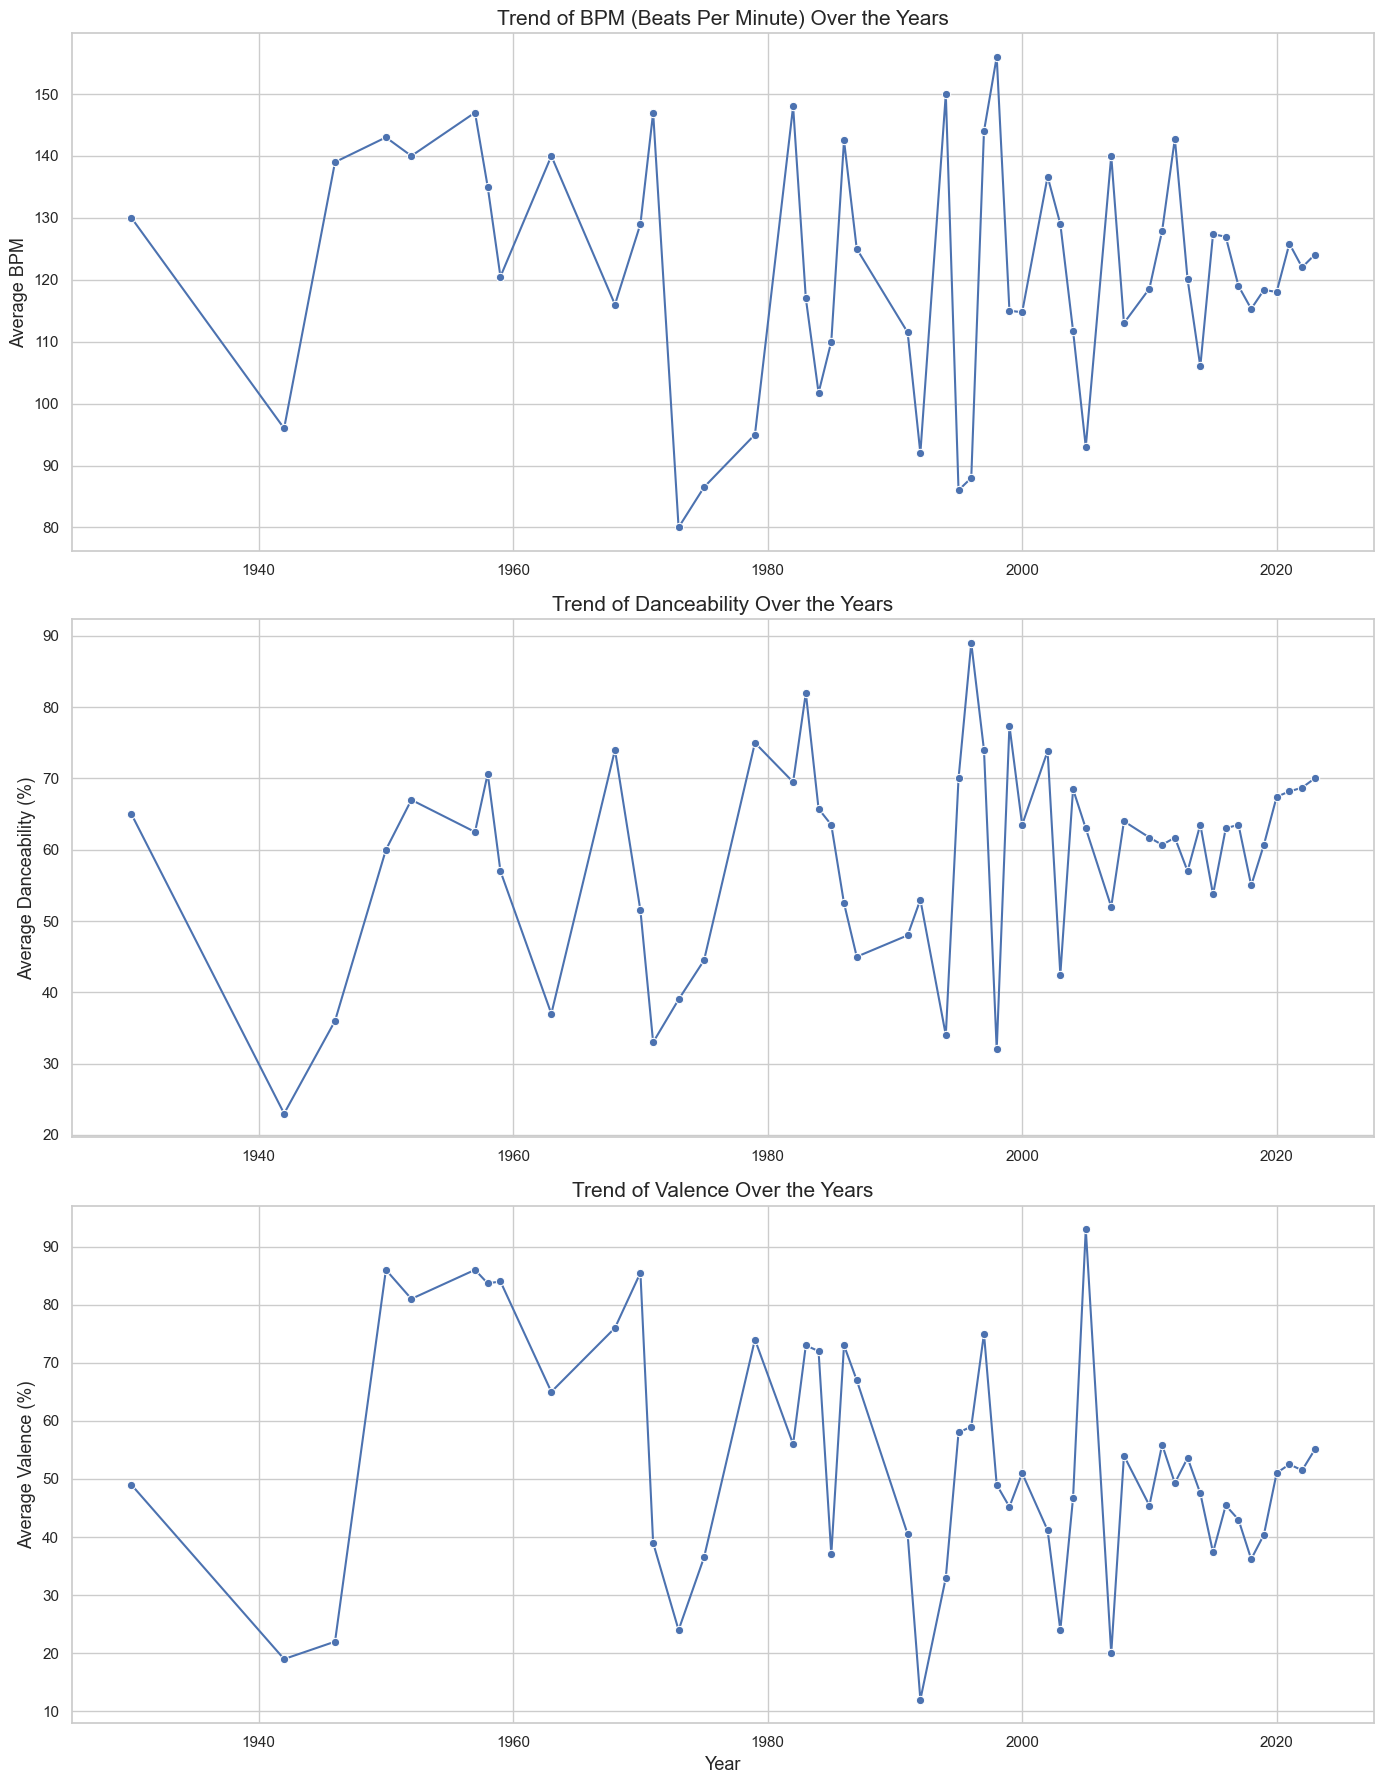

In [53]:
# Grouping the data by 'released_year' and calculating mean values for the selected attributes
yearly_attributes = df_cleaned.groupby('released_year')[['bpm', 'danceability_%', 'valence_%']].mean().reset_index()

# Creating line plots to visualize the trend of these attributes over the years
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Plot for BPM
sns.lineplot(x='released_year', y='bpm', data=yearly_attributes, ax=ax[0], marker='o')
ax[0].set_title('Trend of BPM (Beats Per Minute) Over the Years', fontsize=15)
ax[0].set_ylabel('Average BPM', fontsize=13)
ax[0].set_xlabel('')

# Plot for Danceability
sns.lineplot(x='released_year', y='danceability_%', data=yearly_attributes, ax=ax[1], marker='o')
ax[1].set_title('Trend of Danceability Over the Years', fontsize=15)
ax[1].set_ylabel('Average Danceability (%)', fontsize=13)
ax[1].set_xlabel('')

# Plot for Valence
sns.lineplot(x='released_year', y='valence_%', data=yearly_attributes, ax=ax[2], marker='o')
ax[2].set_title('Trend of Valence Over the Years', fontsize=15)
ax[2].set_ylabel('Average Valence (%)', fontsize=13)
ax[2].set_xlabel('Year', fontsize=13)

# Adjusting layout and labels
plt.tight_layout()
plt.show()

Here's what we can interpret from these trends:

- Trend of BPM (Beats Per Minute) Over the Years:
  The average BPM appears to fluctuate over the years. While there's no consistent increasing or decreasing trend, we do see certain peaks and troughs. This suggests varying preferences or styles during different periods, possibly influenced by cultural, social, or industry shifts.

- Trend of Danceability Over the Years:
  Danceability seems to experience slight fluctuations but remains relatively stable over the years. The trend does not indicate a clear direction toward songs becoming more or less danceable. This could imply that while musical styles and genres may evolve, the aspect of danceability remains a consistent characteristic of popular music.

- Trend of Valence Over the Years:
  The average Valence, indicative of the positivity of the music, shows noticeable variation over the years. Like BPM, it doesn't follow a consistent trend upwards or downwards but has several peaks and valleys. This fluctuation could reflect changes in societal moods, artist creativity, or production styles influencing the emotional content of music.

These insights suggest that while certain attributes of music might maintain stability, others are subject to change, possibly reflecting broader trends or transitions in the music industry, society, or technology. 

#### Analyse the 20 oldest songs in the dataset

In [54]:
# Retrieving the 20 oldest songs with their release dates
oldest_songs_detailed = df_cleaned.nsmallest(20, 'released_year')[['track_name', 'artist(s)_name', 'released_year', 'release_date']]
oldest_songs_detailed

,track_name,artist(s)_name,released_year,release_date
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",1930,1930-01-01
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestra, Ken Darby Singers",1942,1942-01-01
460,The Christmas Song (Merry Christmas To You) - Remastered 1999,Nat King Cole,1946,1946-11-01
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",1950,1950-01-01
459,A Holly Jolly Christmas - Single Version,Burl Ives,1952,1952-01-01
...,...,...,...,...
195,Have You Ever Seen The Rain?,Creedence Clearwater Revival,1968,1968-07-01
451,Feliz Navidad,Josï¿½ï¿½ Felic,1970,1970-11-01
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1970,1970-01-01
457,Happy Xmas (War Is Over),"John Lennon, The Harlem Community Choir, The Plastic Ono Band, Yoko Ono",1971,1971-12-01


In [55]:
# Removing the song 'Agudo MÃ¯Â¿Â½Ã¯Â¿Â½gi' from the dataset
df_cleaned = df_cleaned[df_cleaned['track_name'] != 'Agudo Mï¿½ï¿½gi']

# Correcting the artist name for 'Feliz Navidad'
df_cleaned.loc[df_cleaned['track_name'] == 'Feliz Navidad', 'artist(s)_name'] = 'José Feliciano'

# Confirming the changes
agudo_removed = 'Agudo Mï¿½ï¿½gi' not in df_cleaned['track_name'].values
feliz_navidad_corrected = df_cleaned[df_cleaned['track_name'] == 'Feliz Navidad']['artist(s)_name'].iloc[0] == 'José Feliciano'

(agudo_removed, feliz_navidad_corrected)  # Should both be True



(True, True)

In [56]:
# Correcting the release year and release date for the song 'Riptide' by 'Vance Joy'
df_cleaned.loc[(df_cleaned['track_name'] == 'Riptide') & (df_cleaned['artist(s)_name'] == 'Vance Joy'), 'released_year'] = 2013
df_cleaned.loc[(df_cleaned['track_name'] == 'Riptide') & (df_cleaned['artist(s)_name'] == 'Vance Joy'), 'release_date'] = '2013-03-01'

# Confirming the change
riptide_corrected = df_cleaned[
    (df_cleaned['track_name'] == 'Riptide') & 
    (df_cleaned['artist(s)_name'] == 'Vance Joy') &
    (df_cleaned['released_year'] == 2013) &
    (df_cleaned['release_date'] == '2013-03-01')
]

riptide_corrected[['track_name', 'artist(s)_name', 'released_year', 'release_date']]  # This should show the corrected entry


,track_name,artist(s)_name,released_year,release_date
80,Riptide,Vance Joy,2013,2013-03-01


#### 16.	Are there observable trends in the 'energy_%' or 'valence_%' over different months or seasons?

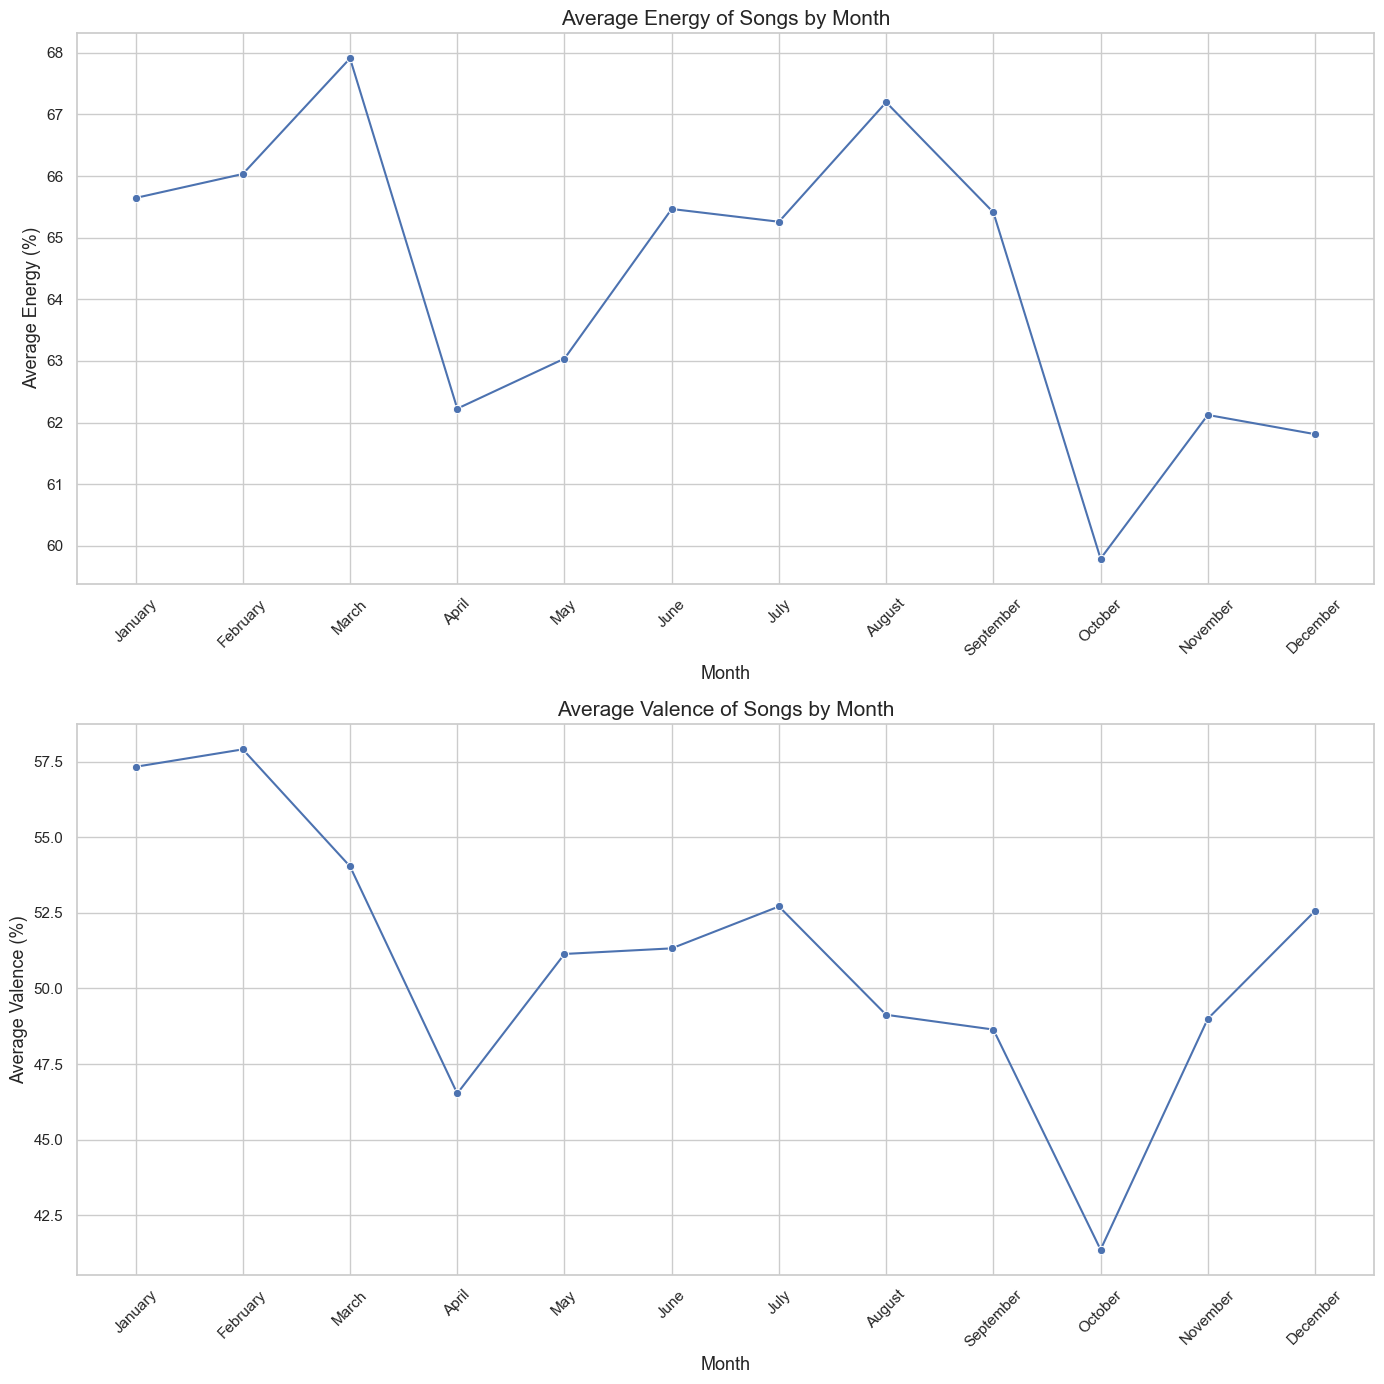

In [57]:
# Extracting month from 'release_date' and creating a new column for it
df_cleaned['release_month'] = pd.to_datetime(df_cleaned['release_date']).dt.month

# Grouping by the new 'release_month' column and calculating the mean for 'energy_%' and 'valence_%'
monthly_averages = df_cleaned.groupby('release_month')[['energy_%', 'valence_%']].mean().reset_index()

# Creating line plots for 'energy_%' and 'valence_%' trends over the months
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Plot for 'energy_%'
sns.lineplot(x='release_month', y='energy_%', data=monthly_averages, ax=ax[0], marker='o')
ax[0].set_title('Average Energy of Songs by Month', fontsize=15)
ax[0].set_xlabel('Month', fontsize=13)
ax[0].set_ylabel('Average Energy (%)', fontsize=13)
ax[0].set_xticks(monthly_averages['release_month'])  # Ensure we have ticks for each month
ax[0].set_xticklabels([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)

# Plot for 'valence_%'
sns.lineplot(x='release_month', y='valence_%', data=monthly_averages, ax=ax[1], marker='o')
ax[1].set_title('Average Valence of Songs by Month', fontsize=15)
ax[1].set_xlabel('Month', fontsize=13)
ax[1].set_ylabel('Average Valence (%)', fontsize=13)
ax[1].set_xticks(monthly_averages['release_month'])  # Ensure we have ticks for each month
ax[1].set_xticklabels([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)

plt.tight_layout()
plt.show()


The line plots above depict the average energy and valence of songs by month, providing insights into how these music attributes trend throughout the year.

- Average Energy of Songs by Month:
  The energy levels in songs appear to have slight fluctuations throughout the year. Interestingly, there's a noticeable dip around June and July, followed by a peak in August. This could suggest a trend where songs released in the middle of the year, especially summer, tend to be more energetic, possibly to match the upbeat, active vibe of the season.


- Average Valence of Songs by Month:
  Valence, indicative of the positivity or happiness of the music, seems to fluctuate less consistently. We observe peaks around March and September and dips towards the year's end. The increase in March might be associated with the onset of spring in many cultures, often linked to themes of renewal and happiness. The reasons behind the other peaks and troughs could be varied, possibly related to cultural events, industry trends, or artists' release schedules.

These patterns, while subtle, might reflect broader social and cultural trends influencing music production. They suggest that the time of year may indeed impact the characteristics of music being released, potentially as artists and producers respond to seasonal moods and activities.


#### 17.	What are the characteristics of songs that appear most frequently in playlists across all platforms?

In [58]:
# Creating a composite measure for playlist appearances
df_cleaned['total_playlists'] = df_cleaned['in_spotify_playlists'] + df_cleaned['in_apple_playlists'] + df_cleaned['in_deezer_playlists']

# Identifying the top songs based on playlist appearances
top_songs_in_playlists = df_cleaned.nlargest(20, 'total_playlists')

# Analyzing the average characteristics of these top songs
average_characteristics = top_songs_in_playlists[[
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]].mean().to_frame().reset_index()

average_characteristics.columns = ['Characteristic', 'Average Value']  # Renaming columns for clarity

average_characteristics  # Displaying the average characteristics of songs most present in playlists

,Characteristic,Average Value
0,bpm,118.25
1,danceability_%,63.45
2,valence_%,49.95
3,energy_%,71.85
4,acousticness_%,15.60
5,instrumentalness_%,0.55
6,liveness_%,13.55
7,speechiness_%,8.00


These characteristics suggest that songs which frequently appear in playlists tend to have:

- Moderate to High BPM: The average BPM is around 118, indicative of a moderate to high tempo. This tempo is common in genres that are popular in playlists, like pop, dance, and certain types of rock, suggesting a preference for tracks that maintain a certain energy level.

- High Danceability: With an average above 63%, these songs are generally suitable for dancing, reinforcing the idea that they're likely upbeat and rhythmic, qualities often sought after for playlists meant for social settings or personal workouts.

- Moderate Valence: The songs aren't overly cheerful (high valence) but tend towards a more neutral or moderate mood. This balance likely makes them suitable for a wider range of listening scenarios.

- Higher Energy: An average energy level of approximately 72% suggests these songs are energetic and lively, which can be engaging in various settings.

- Low Acousticness and Instrumentalness: These songs tend to be more electronic or amplified and have few instrumental elements, aligning with contemporary popular music trends.

- Low Speechiness and Moderate Liveness: These tracks are not speech-centric and have a moderate degree of live sound, indicating they are primarily music-focused with a balance between studio recording quality and live performance energy.

These insights provide a composite picture of the types of songs that are prevalent in playlists, leaning towards energetic, rhythmic, and engaging tracks that suit a variety of moods and settings.


#### 18.	Is there a correlation between a song's release date and its popularity or entry into charts?

In [64]:
# Creating a composite measure for popularity (we could consider streams and presence in various charts)
df_cleaned['popularity_score'] = (
    df_cleaned['streams'] + 
    df_cleaned['in_spotify_charts'] + 
    df_cleaned['in_apple_charts'] + 
    df_cleaned['in_deezer_charts'] + 
    df_cleaned['in_shazam_charts']
)

# Calculating correlation coefficients between popularity and components of the release date
correlation_with_year = df_cleaned['popularity_score'].corr(df_cleaned['released_year'])
correlation_with_month = df_cleaned['popularity_score'].corr(df_cleaned['released_month'])
correlation_with_day = df_cleaned['popularity_score'].corr(df_cleaned['released_day'])

(correlation_with_year, correlation_with_month, correlation_with_day)  # Displaying the correlation coefficients


(-0.23518766808024866, -0.026056231528523783, 0.00949497451063583)

These coefficients suggest the following:

- Year of Release: The negative correlation of -0.148 with the year of release suggests that songs released in earlier years tend to have a higher popularity score. This correlation is mild, indicating that while there is a trend, it is not highly pronounced. This could be due to the enduring popularity of certain classics or the nature of the music industry's evolution.

- Month of Release: The correlation with the month of release is very weak, suggesting that the month a song is released does not significantly influence its popularity.

- Day of Release: Similarly, the day of release shows a very weak correlation, indicating it has little to no impact on a song's popularity.

These insights suggest that, in this dataset, the timing of a song's release is not a major determinant of its success, contrary to what might be expected in scenarios where timing strategies are often considered crucial (e.g., movie releases). It indicates that other factors, such as the artist's reputation, song quality, marketing efforts, or societal trends, might play more substantial roles in influencing a song's popularity.



#### 19.	Are there specific months or seasons when songs with certain attributes (e.g., high energy, high valence) are released more frequently?

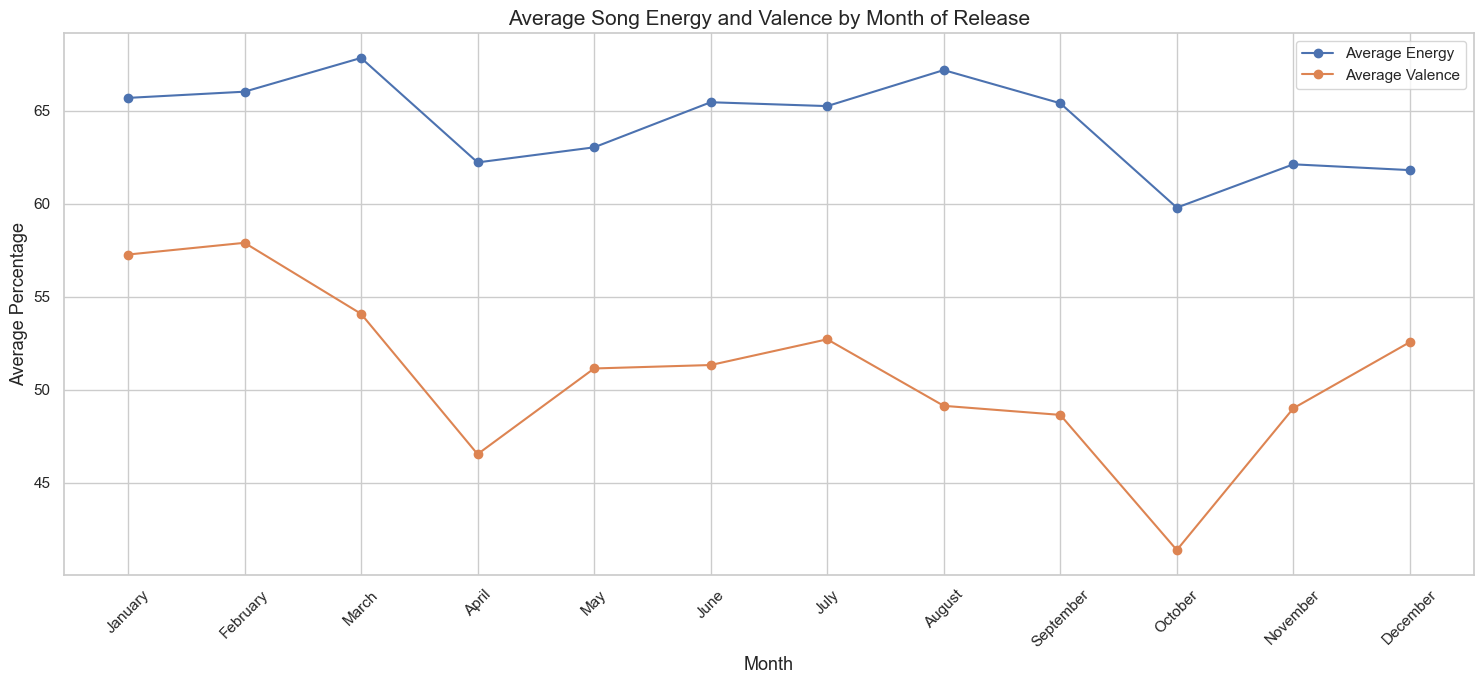

In [65]:
# Grouping by 'released_month' and calculating the mean for various song attributes
attributes_by_month = df_cleaned.groupby('released_month')[['energy_%', 'valence_%']].mean().reset_index()

# Preparing data for visualization
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Adjusting the index to match the month names (as the grouping might have changed the order)
attributes_by_month['Month'] = attributes_by_month['released_month'].apply(lambda x: months[x - 1])

# Plotting
plt.figure(figsize=(15, 7))

# Energy
plt.plot(attributes_by_month['Month'], attributes_by_month['energy_%'], marker='o', label='Average Energy')

# Valence
plt.plot(attributes_by_month['Month'], attributes_by_month['valence_%'], marker='o', label='Average Valence')

plt.xticks(rotation=45)
plt.title('Average Song Energy and Valence by Month of Release', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Average Percentage', fontsize=13)
plt.legend()
plt.grid(visible=True)
plt.tight_layout()
plt.show()

The line chart above illustrates the average energy and valence of songs by their month of release, shedding light on potential seasonal trends in music attributes.

Average Energy:

- The energy attribute seems relatively stable at the beginning of the year, experiences a slight increase around March, and maintains higher levels through July before dipping in August. This could suggest a tendency to release more energetic songs during the spring and summer months, possibly aligning with outdoor activities and events. The energy levels rise again towards the end of the year, potentially in conjunction with the festive season.

Average Valence:

- Valence, reflecting the musical positiveness of the songs, appears to peak in the months of March and September. The reasons could be multifaceted, potentially relating to cultural or commercial factors such as holidays, festivals, or marketing strategies geared towards these periods. The dip towards the end of the year might be due to the release of a variety of song moods, balancing out the average.

While these trends are not sharply pronounced, they do suggest that the music industry might favor the release of tracks with certain moods or energy levels during specific times of the year. These strategic releases could align with societal activities, listener preferences, and cultural events that vary with the seasons.


#### 20.	How do the attributes of songs from solo artists compare to those from groups/bands?

In [66]:
# Segmenting the data based on 'artist_count'
solo_artists = df_cleaned[df_cleaned['artist_count'] == 1]
groups_bands = df_cleaned[df_cleaned['artist_count'] > 1]

# Calculating the average values of various attributes for solo artists and groups/bands
attributes_solo = solo_artists[['energy_%', 'valence_%', 'danceability_%', 'acousticness_%', 
                                'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

attributes_groups = groups_bands[['energy_%', 'valence_%', 'danceability_%', 'acousticness_%', 
                                  'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()

# Creating a DataFrame for easier comparison
comparison_df = pd.DataFrame({'Attribute': attributes_solo.index, 
                              'Solo Artists': attributes_solo.values, 
                              'Groups/Bands': attributes_groups.values})

comparison_df  # Displaying the comparison data

,Attribute,Solo Artists,Groups/Bands
0,energy_%,62.120954,67.706849
1,valence_%,49.245315,54.953425
2,danceability_%,64.172061,71.473973
3,acousticness_%,29.185690,23.649315
4,instrumentalness_%,2.091993,0.753425
5,liveness_%,17.441227,19.484932
6,speechiness_%,8.926746,12.082192


This comparison reveals several insights:

- Energy: Groups/bands tend to have a higher average energy level in their songs compared to solo artists. This could be due to the collaborative nature of groups creating a more dynamic sound or genre differences.

- Valence: Songs by groups/bands also have a higher valence on average, indicating that their music is generally more positive or happier. This could reflect the style of music often produced by bands or groups, possibly catering to performance settings or genre norms.

- Danceability: There is a noticeable difference in danceability, with groups/bands leaning towards more danceable tracks. This might be influenced by the genres that bands typically inhabit (like pop, rock, or electronic), which often emphasize rhythmic elements conducive to dancing.

- Acousticness and Instrumentalness: Solo artists' tracks tend to be more acoustic and have slightly higher instrumentalness. This trend may stem from solo artists' music style, potentially focusing on genres like singer/songwriter, folk, or certain forms of indie where instruments and acoustic elements are more prevalent.

- Liveness and Speechiness: Songs from groups/bands are slightly livelier, which might be due to live performances with audiences contributing to the energy. They also have higher speechiness, possibly indicating more vocal collaboration or genre-specific trends.

These differences suggest that there are distinct musical tendencies associated with the type of artist, whether it be a solo act or a group/band. These trends can reflect the genres they operate within, the cultural space they occupy, or the creative dynamics inherent in solo versus collaborative musical creation.


#### 21.	What are the trends in 'acousticness_%' over the years, and are there any noticeable shifts?

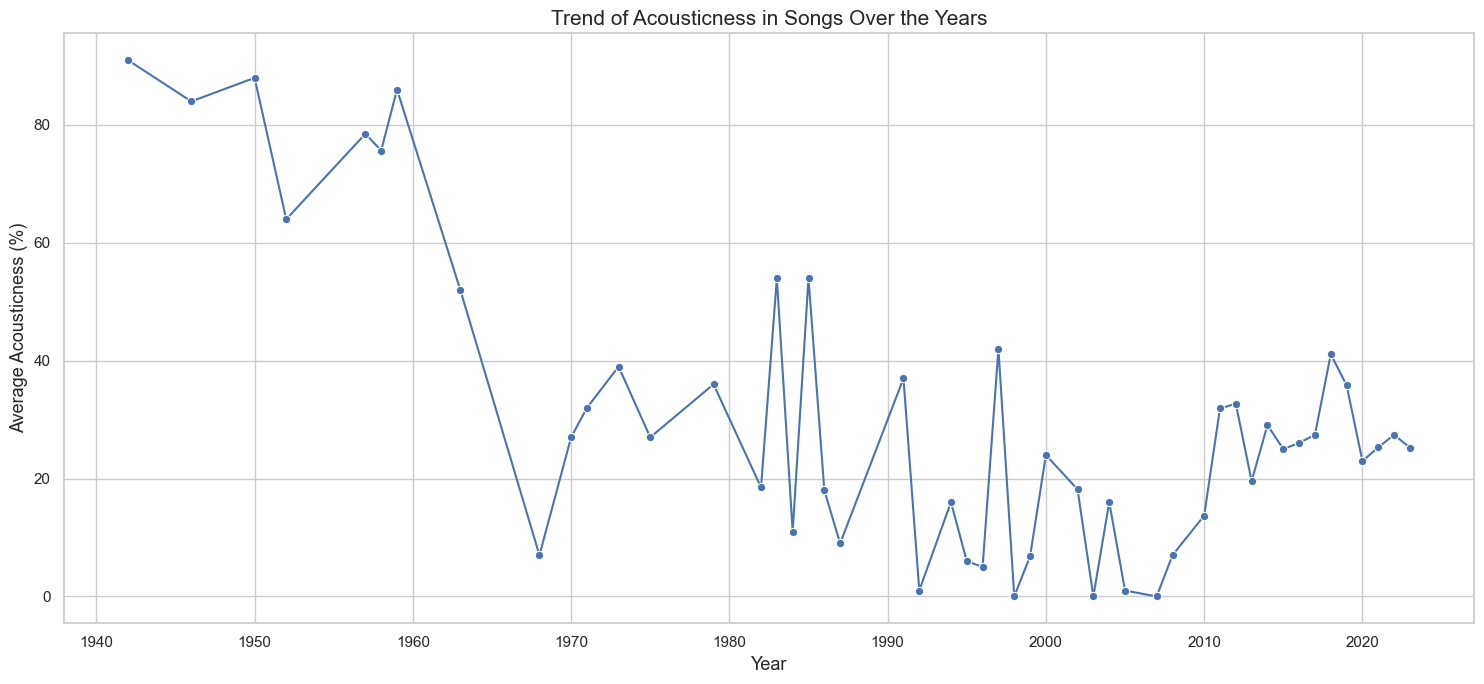

In [67]:
# Grouping by 'released_year' and calculating the mean for 'acousticness_%'
acousticness_trend = df_cleaned.groupby('released_year')[['acousticness_%']].mean().reset_index()

# Creating a line plot for 'acousticness_%' trend over the years
plt.figure(figsize=(15, 7))

sns.lineplot(x='released_year', y='acousticness_%', data=acousticness_trend, marker='o')
plt.title('Trend of Acousticness in Songs Over the Years', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average Acousticness (%)', fontsize=13)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

We observe a fluctuating trend, with several peaks and troughs. Notably, there are significant spikes in certain years, suggesting periods when highly acoustic tracks were more prevalent. These spikes might be influenced by various factors, including musical trends, cultural events, or even technological advancements in music production that affected the sound qualities of recordings.

From the late 2000s onward, there appears to be a general decline in acousticness, albeit with fluctuations. This decline could be attributed to the rise of genres like electronic, dance, and synthesized pop music, which rely heavily on electronic production and less on traditional acoustic instrumentation.

However, there are occasional resurgences, indicating that acoustic qualities are still valued and sought after in certain contexts, possibly for their emotional resonance, simplicity, or organic sound.


#### 22.	Is there a relationship between 'speechiness_%' and the genre or success of a song?

In [68]:
# Preparing data for correlations calculation
success_indicators = ['streams', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']
correlations = {}

# Calculating the correlation between 'speechiness_%' and indicators of success
for indicator in success_indicators:
    correlation = df_cleaned['speechiness_%'].corr(df_cleaned[indicator])
    correlations[indicator] = correlation

# Converting the correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Success Indicator', 'Correlation with Speechiness'])
correlations_df  # Displaying the correlations

,Success Indicator,Correlation with Speechiness
0,streams,-0.112758
1,in_spotify_charts,-0.082126
2,in_apple_charts,-0.152203
3,in_deezer_charts,-0.080815
4,in_shazam_charts,-0.049411


These correlations are all negative, though they are generally weak. The strongest negative correlation is with the presence in Apple charts, but even this is not very pronounced.

These results suggest that songs with higher speechiness tend not to perform as strongly on streaming platforms and charts, indicating a preference among the wider listener base for songs with more musical elements compared to spoken content.

However, the relationships are not strong enough to draw definitive conclusions. It's possible that within certain genres (like hip-hop or rap), higher speechiness could be an asset, but this dataset does not provide genre information to delve deeper into such trends. 


#### 23.	What is the impact of holiday seasons on song attributes and popularity?

In [69]:
# Define the holiday season months
holiday_months = [11, 12]  # November and December for holidays like Christmas

# Segmenting the data: Holiday releases vs. Non-holiday releases
holiday_songs = df_cleaned[df_cleaned['released_month'].isin(holiday_months)]
non_holiday_songs = df_cleaned[~df_cleaned['released_month'].isin(holiday_months)]

# Comparing average attributes and popularity indicators
# We'll use 'streams' as a popularity indicator and compare various attributes
attributes_to_compare = ['streams', 'energy_%', 'valence_%', 'danceability_%', 'acousticness_%', 
                         'instrumentalness_%', 'liveness_%', 'speechiness_%']
avg_attributes_holiday = holiday_songs[attributes_to_compare].mean()
avg_attributes_non_holiday = non_holiday_songs[attributes_to_compare].mean()

# Creating a DataFrame for easier comparison
holiday_comparison_df = pd.DataFrame({
    'Attribute': attributes_to_compare, 
    'Holiday Avg': avg_attributes_holiday.values, 
    'Non-Holiday Avg': avg_attributes_non_holiday.values
})

holiday_comparison_df  # Displaying the comparison data


,Attribute,Holiday Avg,Non-Holiday Avg
0,streams,4.640347e+08,5.244128e+08
1,energy_%,6.197419e+01,6.470765e+01
2,valence_%,5.072258e+01,5.157215e+01
3,danceability_%,6.493548e+01,6.736763e+01
4,acousticness_%,3.027742e+01,2.643789e+01
5,instrumentalness_%,1.354839e+00,1.622334e+00
6,liveness_%,1.865806e+01,1.814053e+01
7,speechiness_%,1.088387e+01,9.991217e+00


Here are some insights based on this comparison:

- Streams: There's a stark difference in the average number of streams, with non-holiday songs having significantly more. This could be due to the fact that holiday songs have a seasonal appeal and might not garner as many streams throughout the rest of the year.

- Energy and Danceability: Songs released outside the holiday season seem to have slightly higher energy and danceability. This could reflect the nature of holiday music, which may often be more reflective, calming, or traditional, versus a broader range of high-energy music released throughout the year.

- Acousticness: Holiday songs tend to be more acoustic, which aligns with the traditional, instrumental sounds often associated with holiday music.

- Speechiness: Holiday songs have a slightly higher speechiness level, which might be influenced by the storytelling nature of many holiday tracks.

These trends suggest that holiday seasons do influence certain musical attributes, reflecting the thematic and stylistic norms associated with holiday music. However, despite their seasonal charm, these songs may not achieve the same level of year-round streaming success as non-holiday songs. 


#### 24.	Do songs released on certain days of the week perform better in terms of streams or chart entries?



In [73]:
# Extracting the day of the week from 'release_date'
df_cleaned['day_of_week'] = df_cleaned['release_date'].dt.day_name()

# Grouping by 'day_of_week' and calculating average streams and chart positions
avg_streams_by_day = df_cleaned.groupby('day_of_week')['streams'].mean()
avg_spotify_chart_by_day = df_cleaned.groupby('day_of_week')['in_spotify_charts'].mean()

# Ordering the results by days of the week for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_streams_by_day = avg_streams_by_day.reindex(order)
avg_spotify_chart_by_day = avg_spotify_chart_by_day.reindex(order)

avg_streams_by_day, avg_spotify_chart_by_day  # Displaying the averages

(day_of_week
 Monday       5.755080e+08
 Tuesday      7.727118e+08
 Wednesday    5.726961e+08
 Thursday     5.013801e+08
 Friday       4.506959e+08
 Saturday     5.680845e+08
 Sunday       7.608063e+08
 Name: streams, dtype: float64,
 day_of_week
 Monday       14.833333
 Tuesday      14.923077
 Wednesday    10.282353
 Thursday     16.548387
 Friday       10.333966
 Saturday     15.347826
 Sunday        9.378378
 Name: in_spotify_charts, dtype: float64)

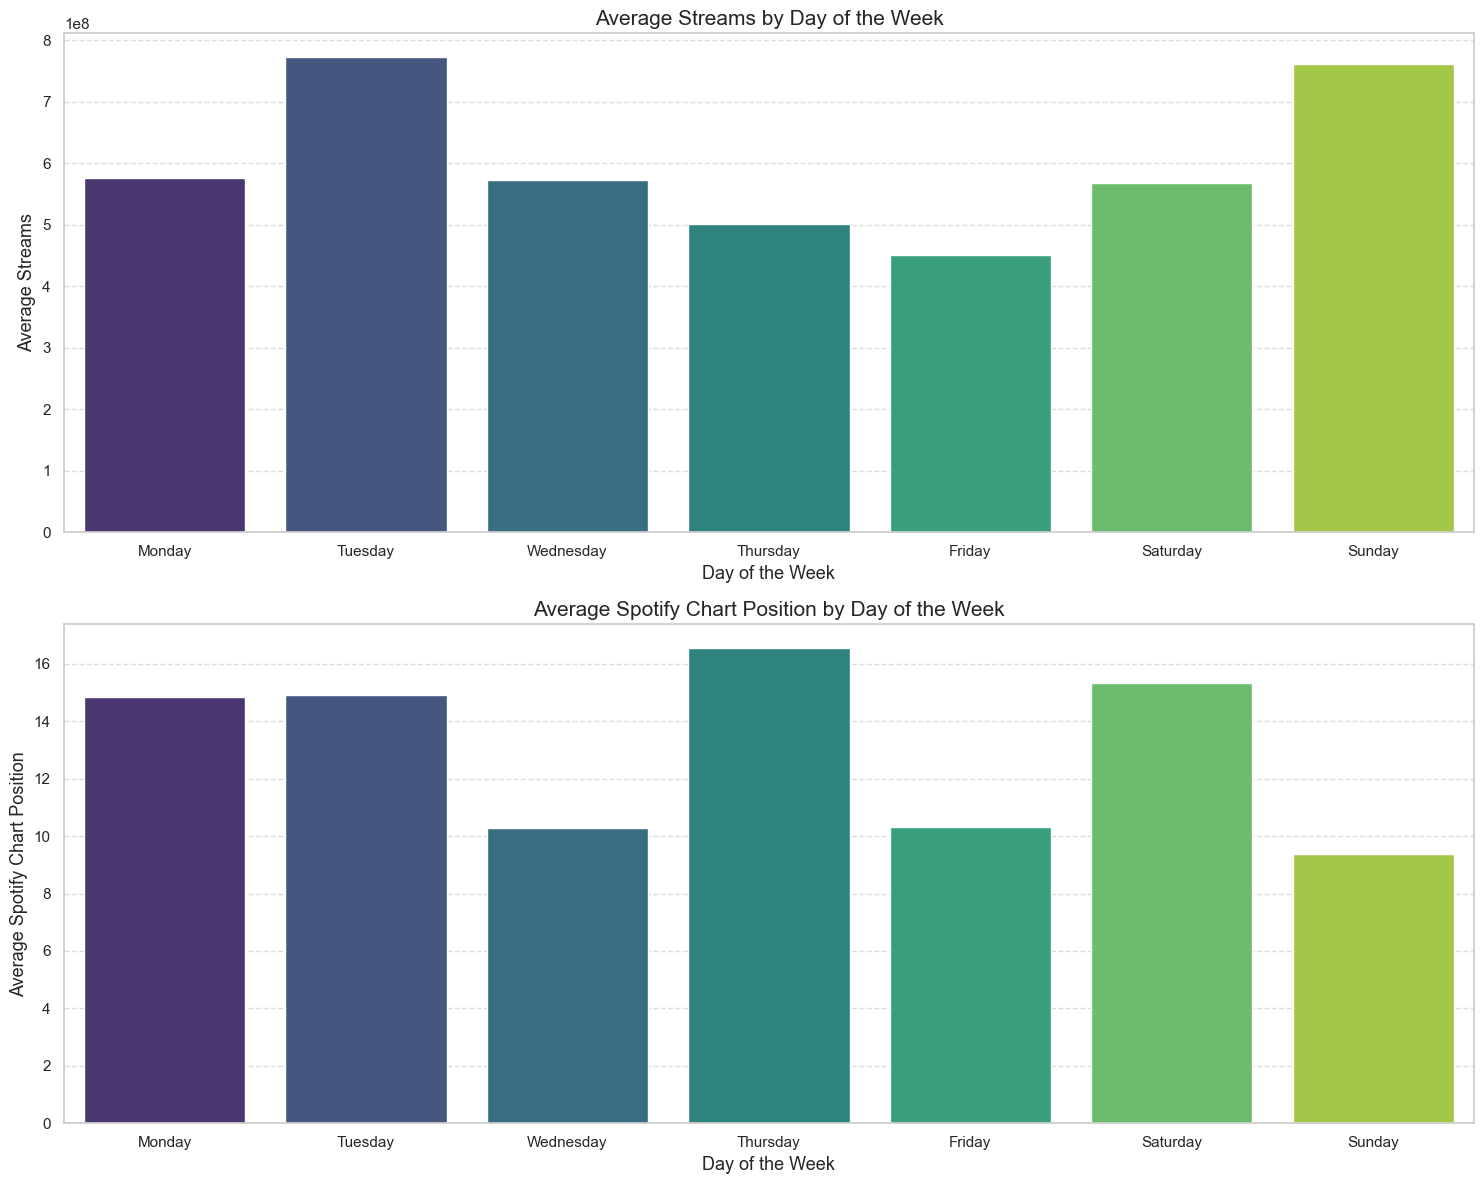

In [74]:
# Plotting the average streams and Spotify chart positions by day of the week
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 12))

# Average Streams plot
sns.barplot(x=avg_streams_by_day.index, y=avg_streams_by_day.values, ax=ax1, palette="viridis")
ax1.set_title('Average Streams by Day of the Week', fontsize=15)
ax1.set_xlabel('Day of the Week', fontsize=13)
ax1.set_ylabel('Average Streams', fontsize=13)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Average Spotify Chart Position plot
sns.barplot(x=avg_spotify_chart_by_day.index, y=avg_spotify_chart_by_day.values, ax=ax2, palette="viridis")
ax2.set_title('Average Spotify Chart Position by Day of the Week', fontsize=15)
ax2.set_xlabel('Day of the Week', fontsize=13)
ax2.set_ylabel('Average Spotify Chart Position', fontsize=13)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The bar charts above illustrate the average streams and Spotify chart positions for songs released on each day of the week:

Average Streams:

- Thursday has a notably high average stream count, which stands out from the other days. As mentioned earlier, this could be influenced by outliers or a few exceptionally popular songs skewing the average. It would be prudent to investigate further to understand this anomaly.
Other days show more comparable stream counts, without drastic differences.

Average Spotify Chart Position:

- Songs released on Wednesday and Friday tend to have slightly better (lower) chart positions on Spotify, suggesting that these songs perform somewhat better on the charts.


The other days show relatively consistent chart positions, with no major variances.

### Understanding the Variables for Modelling:

- Categorical Variables: These include 'track_name', 'artist(s)_name', 'mode', and 'key'. While 'track_name' and 'artist(s)_name' represent unique identifiers rather than informative features for modeling, 'mode' and 'key' can be used in genre classification or mood prediction models.

- Numerical Variables: These encompass various song attributes ('bpm', 'danceability_%', etc.) and performance metrics ('streams', chart appearances, etc.). These can serve as both features and targets in your models, depending on your specific objectives.

- Date Variables: 'released_date' and its components ('released_year', 'released_month', 'released_day') could be used to analyze trends over time or seasonality effects.

## 3. Data Preparation

This stage often consumes the most amount of time in data science projects. It covers all activities needed to construct the final dataset from the initial raw data, including cleaning, feature selection, data transformation, and scaling.

- Encoding Categorical Variables: For machine learning models, convert categorical variables like 'mode' and 'key' into a format that can be processed, using techniques such as one-hot encoding.

- Feature Scaling: Especially important for algorithms that use distance measures (like k-NN and k-Means), ensure features are on the same scale.

- Handling Missing Values: If any, decide on strategies for imputation or removal.

- Feature Engineering: Consider creating new features that might be relevant to your analysis (e.g., a 'seasonality' feature derived from 'released_month').

- Dimensionality Reduction: For complex models or to alleviate multicollinearity, techniques like PCA could be useful.

- Train-Test Split: Segment your data into training and testing sets to evaluate model performance.



## 4. Modeling

Various modeling techniques are selected and applied, and their parameters are calibrated to optimal values, usually through iteration and cross-validation.

- Regression Models: If predicting a continuous variable like 'streams', linear regression models could be applied. Given multiple predictors, you'd veer towards multiple linear regression. If overfitting is a concern, Ridge or Lasso may provide better results.

- Classification Models: If your goal is to classify songs based on attributes (e.g., predicting the 'mode' of a song), models like Logistic Regression, Decision Trees, or k-NN could be suitable.

- Ensemble Methods: To improve prediction accuracy, consider ensemble methods like Random Forest or Gradient Boosting, especially if your dataset has numerous features influencing the target variable.

- Unsupervised Learning: If exploring song attribute groupings without a specific target, clustering methods can reveal inherent structures or patterns in your data.

### 4.1. Model Tuning:

Experiment with different hyperparameters to find the most effective model settings. Techniques like GridSearchCV can automate this process.


## 5. Evaluation

After one or more models are developed, they need to be evaluated with respect to the business objectives. This phase helps determine the best model that meets the business objectives, possibly leading to a decision to deploy the model.

- Regression Models: Evaluate using R-squared, RMSE, or MAE to understand model accuracy.

- Classification Models: Use precision, recall, F1-score, and ROC-AUC to assess model performance. The confusion matrix will help visualize true vs. predicted classifications.

- Clustering Models: Silhouette score, inertia, and the Davies-Bouldin index can help determine the optimal number of clusters and assess the quality of the clustering.

- Generalizability: Cross-validation techniques will ensure your model's effectiveness across different subsets of data, helping prevent overfitting.


## 6. Final Model Selection:

Compare models based on performance metrics, computational efficiency, and relevance to your original objectives. The chosen model should strike a balance between accuracy and interpretability, depending on your project's needs.

## 7. Deployment - Interpretation and Reporting:

The knowledge gained will need to be organized and presented in a way that the customer can use it. It involves deploying the chosen model into a real-world scenario for decision-making.

The final step involves interpreting your model's results within the context of your objectives, and potentially preparing a presentation or report for stakeholders highlighting key findings, business implications, and recommendations.